# DataSet Preperation

In [80]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'lightgbm'

In [4]:
data = pd.read_csv(r"C:\Users\DEEPAK YADAV\Downloads\Assignment\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
print("The shape of data frame:", data.shape)
print("Number of Rows in the dataframe:", len(data))
print("Number of Columns in the dataframe:", len(data.columns))

The shape of data frame: (1470, 35)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 35


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
data["Education"] = data["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

In [11]:
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [12]:
data["JobInvolvement"] = data["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

In [13]:
data["JobLevel"] = data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",
                                         5:"Executive Level"})

In [14]:
data["JobSatisfaction"] = data["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})


In [16]:
data["PerformanceRating"] = data["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})

In [17]:
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [18]:
missing_df = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


In [20]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [21]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [22]:
print("The shape of data frame:", data.shape)
print("Number of Rows in the dataframe:", len(data))
print("Number of Columns in the dataframe:", len(data.columns))

The shape of data frame: (1470, 31)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 31


In [24]:
data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


In [25]:
for column in data.columns:
    print(f"{column} - Number of unique values : {data[column].nunique()}")
    print("=============================================================")

Age - Number of unique values : 43
Attrition - Number of unique values : 2
BusinessTravel - Number of unique values : 3
DailyRate - Number of unique values : 886
Department - Number of unique values : 3
DistanceFromHome - Number of unique values : 29
Education - Number of unique values : 5
EducationField - Number of unique values : 6
EnvironmentSatisfaction - Number of unique values : 4
Gender - Number of unique values : 2
HourlyRate - Number of unique values : 71
JobInvolvement - Number of unique values : 4
JobLevel - Number of unique values : 5
JobRole - Number of unique values : 9
JobSatisfaction - Number of unique values : 4
MaritalStatus - Number of unique values : 3
MonthlyIncome - Number of unique values : 1349
MonthlyRate - Number of unique values : 1427
NumCompaniesWorked - Number of unique values : 10
OverTime - Number of unique values : 2
PercentSalaryHike - Number of unique values : 15
PerformanceRating - Number of unique values : 2
RelationshipSatisfaction - Number of uniq

In [26]:
categorical_features = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 30:
        categorical_features.append(column)
        print(f"{column} : {data[column].unique()}")
        print(data[column].value_counts())
        print("====================================================================================")
categorical_features.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']
High 

In [27]:
# Save DataFrame to CSV file
data.to_csv('IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv', index=False)

# Data Visualization


In [29]:
employee_data = pd.read_csv(r'IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

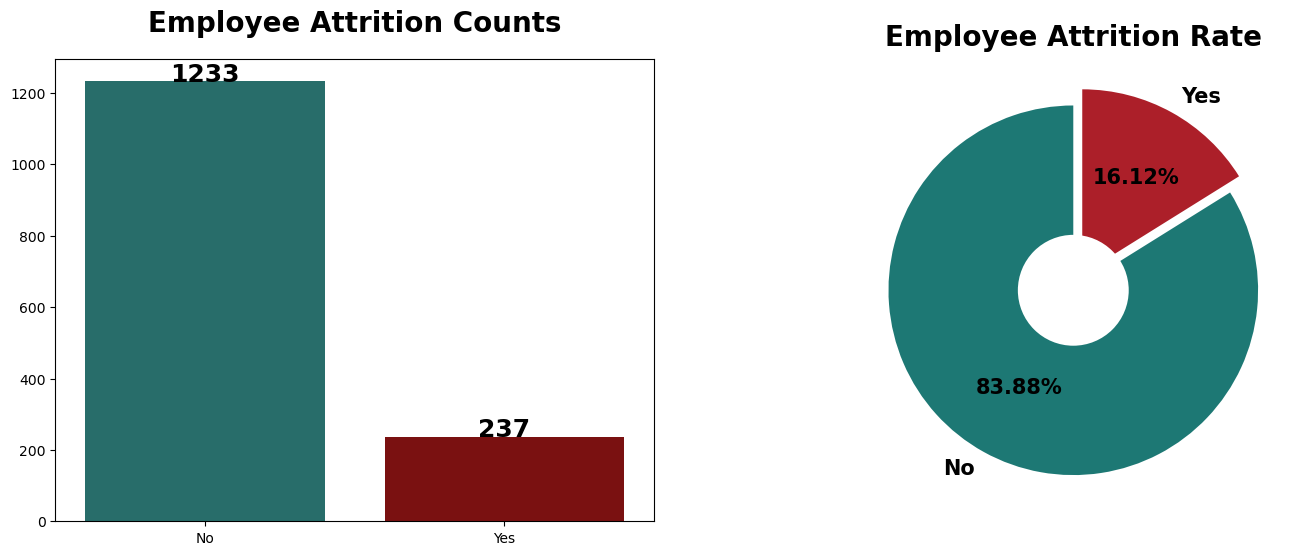

In [32]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = employee_data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()

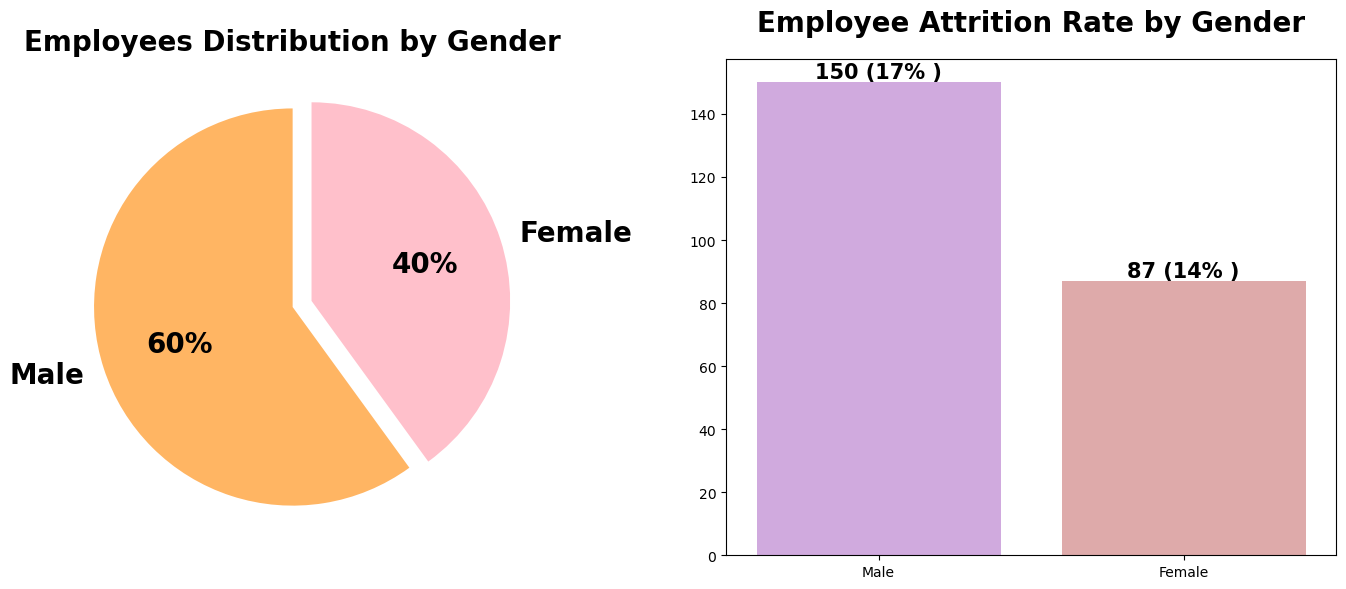

In [33]:
#Visualization to show Total Employees by Gender.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
gender_attrition = employee_data["Gender"].value_counts()
plt.title("Employees Distribution by Gender",fontweight="black",size=20)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])

#Visualization to show Employee Attrition by Gender.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_1 = employee_data["Gender"].value_counts()
value_2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

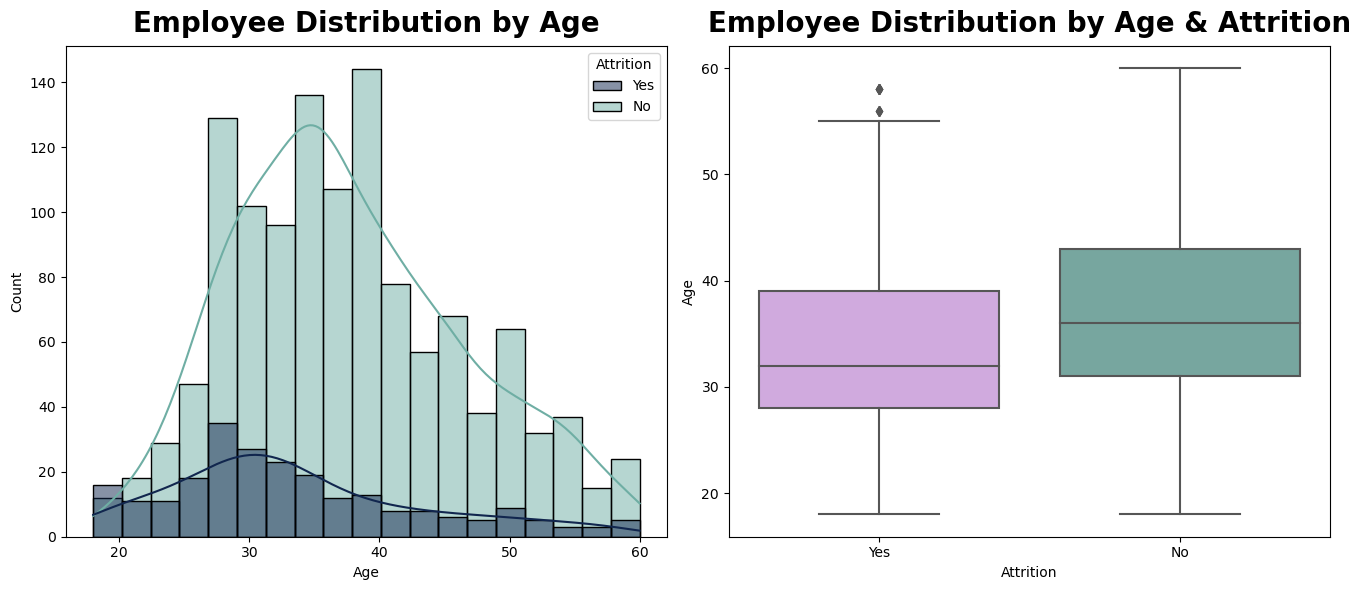

In [34]:
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=employee_data,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)

#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=employee_data,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

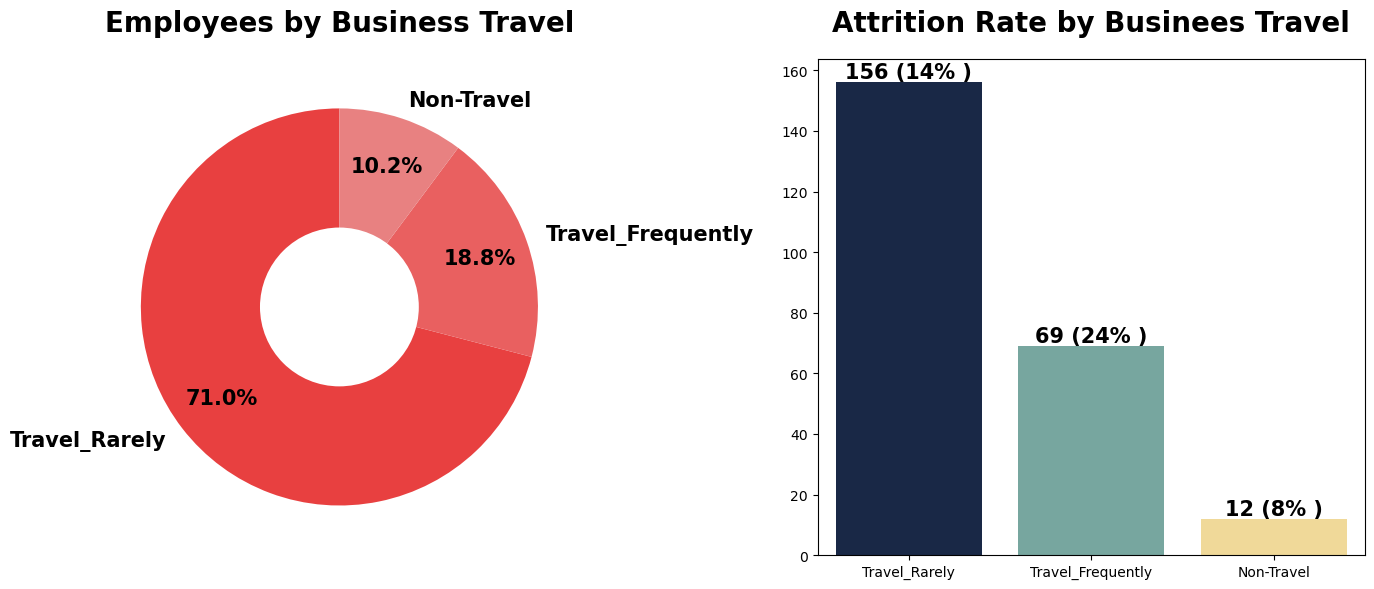

In [35]:
#Visualization to show Total Employees by Businees Travel.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by Businees Travel.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["BusinessTravel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Businees Travel",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

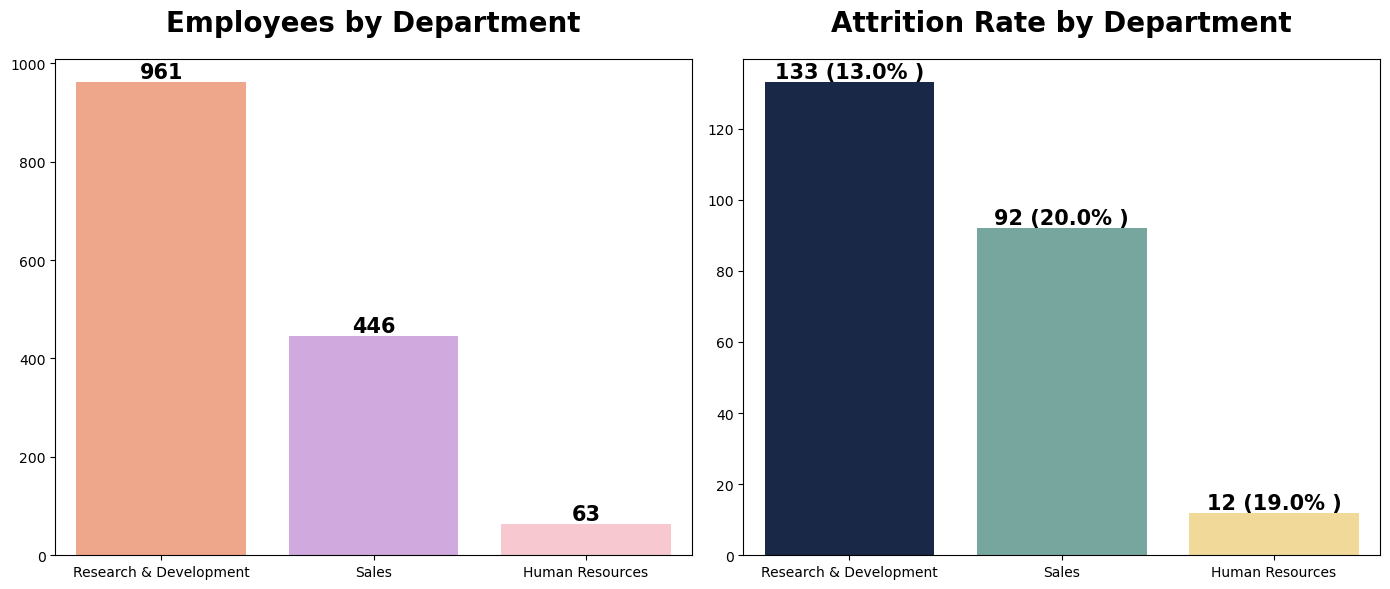

In [37]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["Department"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB"])
plt.title("Employees by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15,)

#Visualization to show Employee Attrition Rate by Department.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["Department"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [38]:
employee_data["DailyRate"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0


In [39]:
# Define the bin edges for the groups
bin_edges = [0, 500, 1000, 1500]

# Define the labels for the groups
bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

# Cut the DailyRate column into groups
employee_data['DailyRateGroup'] = pd.cut(employee_data['DailyRate'], bins=bin_edges, labels=bin_labels)

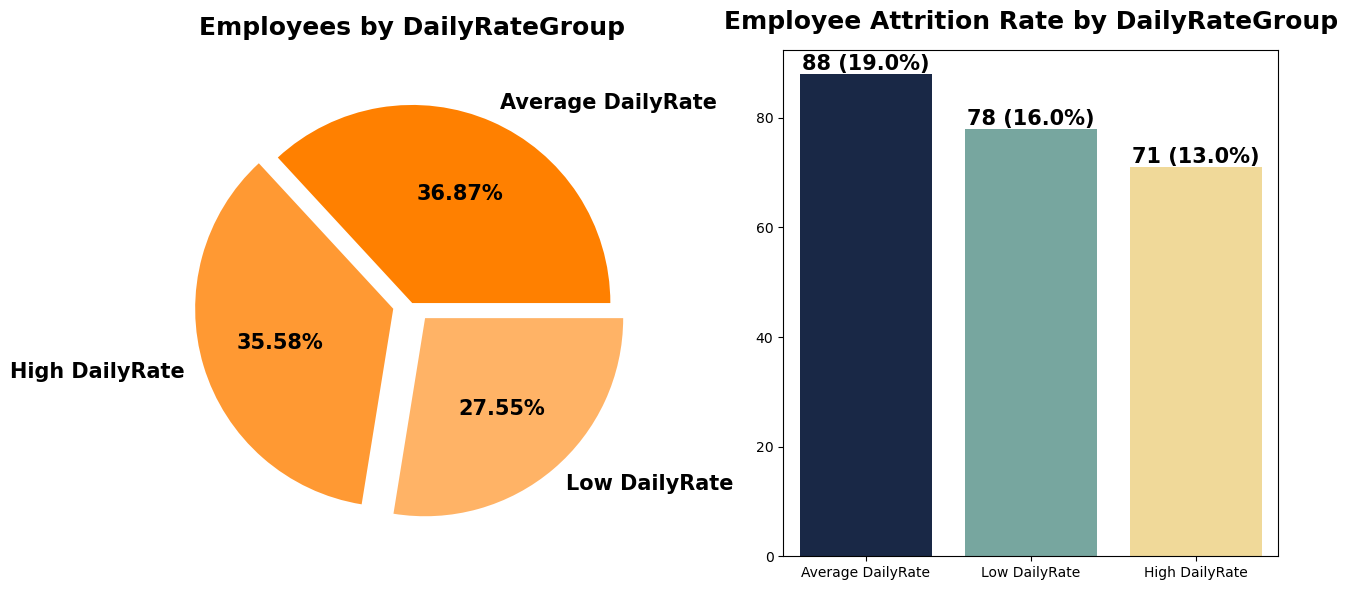

In [40]:
##Visualization to show Total Employees by DailyRateGroup.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = employee_data["DailyRateGroup"].value_counts()
plt.pie(value_1.values, labels=value_1.index,autopct="%.2f%%",textprops={"fontweight":"black","size":15},
        explode=[0,0.1,0.1],colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'])
plt.title("Employees by DailyRateGroup",fontweight="black",pad=15,size=18)

#Visualization to show Attrition Rate by DailyRateGroup.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["DailyRateGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employee Attrition Rate by DailyRateGroup",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

In [41]:
print("Total Unique Values in Attribute is =>",employee_data["DistanceFromHome"].nunique())

Total Unique Values in Attribute is => 29


In [42]:
employee_data["DistanceFromHome"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [44]:
 #Define the bin edges for the groups
bin_edges = [0,2,5,10,30]

# Define the labels for the groups
bin_labels = ['0-2 kms', '3-5 kms', '6-10 kms',"10+ kms"]

# Cuttinf the DistaanceFromHome column into groups
employee_data['DistanceGroup'] = pd.cut(employee_data['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

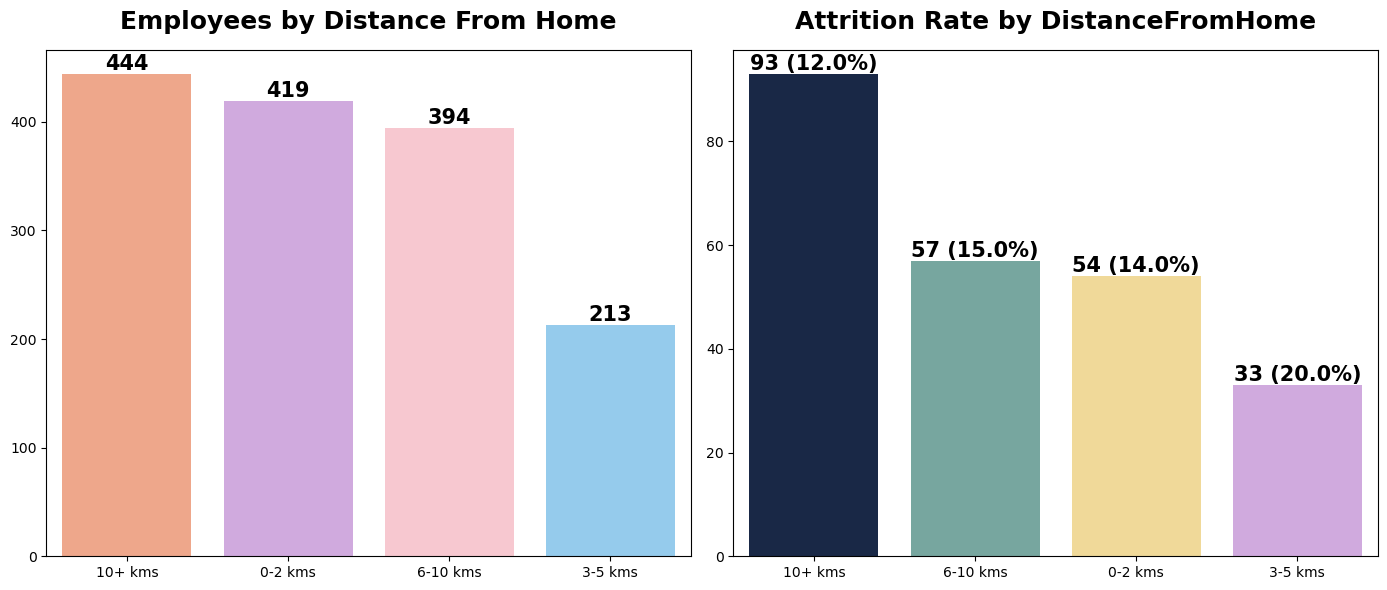

In [45]:
##Visualization to show Total Employees by DistnaceFromHome.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["DistanceGroup"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Distance From Home",fontweight="black",pad=15,size=18)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Attrition Rate by DistanceFromHome.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["DistanceGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by DistanceFromHome",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

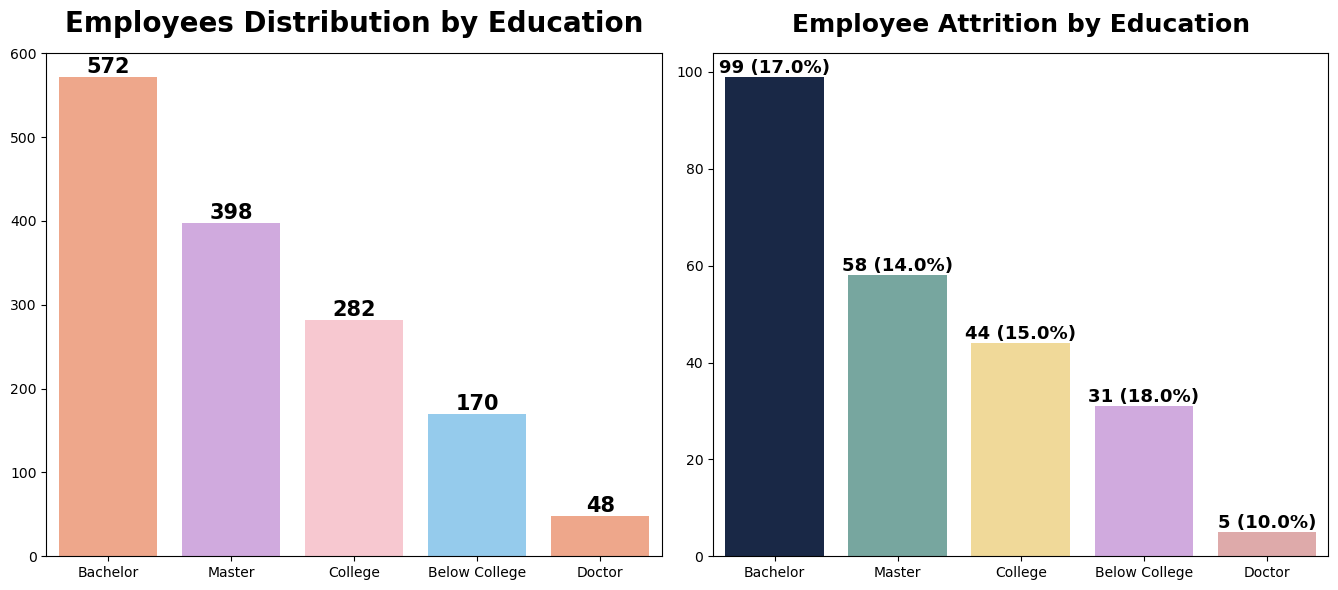

In [46]:
#Visualization to show Total Employees by Education.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
value_1 = employee_data["Education"].value_counts()
sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees Distribution by Education",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Employee Attrition by Education.
plt.subplot(1,2,2)
value_2 = new_df["Education"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition by Education",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.tight_layout()
plt.show()

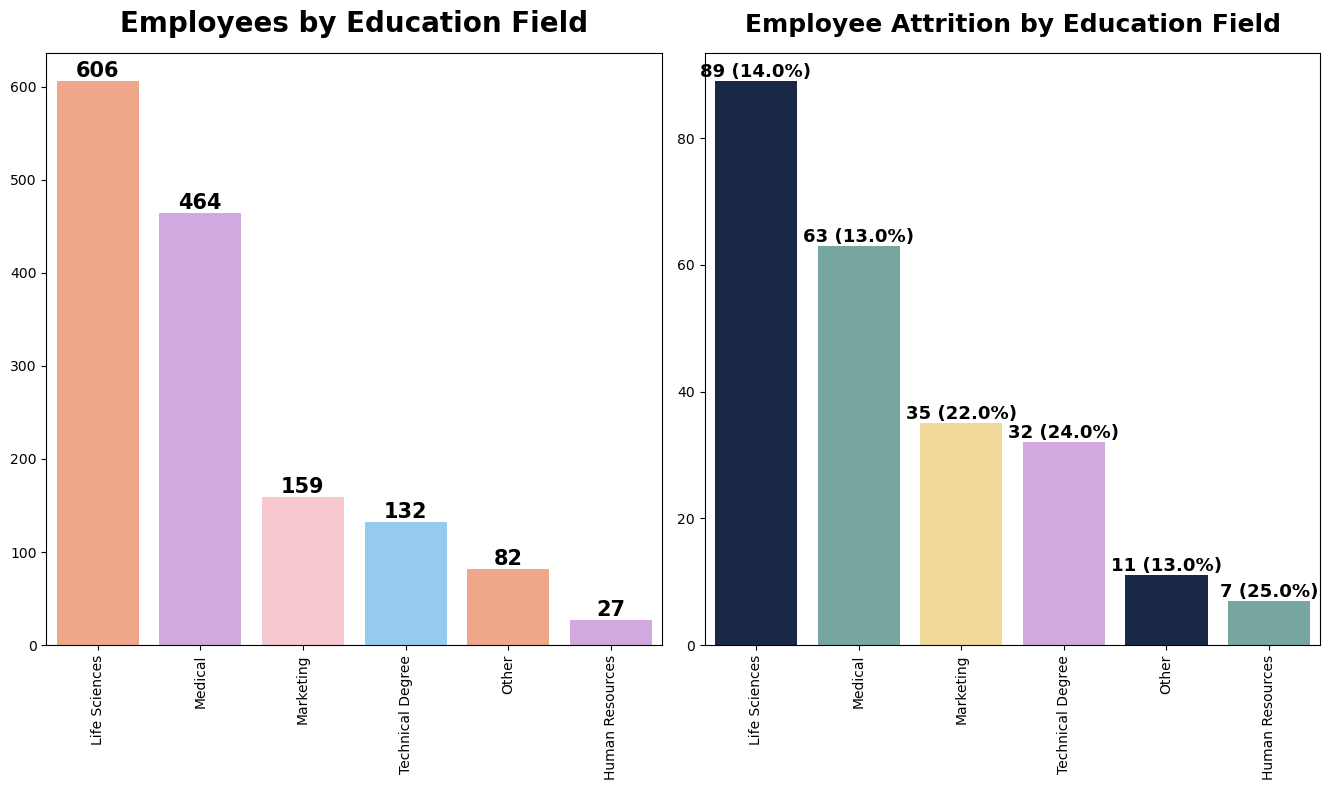

In [47]:
#Visualization to show Total Employees by Education Field.
plt.figure(figsize=(13.5,8))
plt.subplot(1,2,1)
value_1 = employee_data["EducationField"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Education Field",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
plt.xticks(rotation=90)

#Visualization to show Employee Attrition by Education Field.
plt.subplot(1,2,2)
value_2 = new_df["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Employee Attrition by Education Field",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

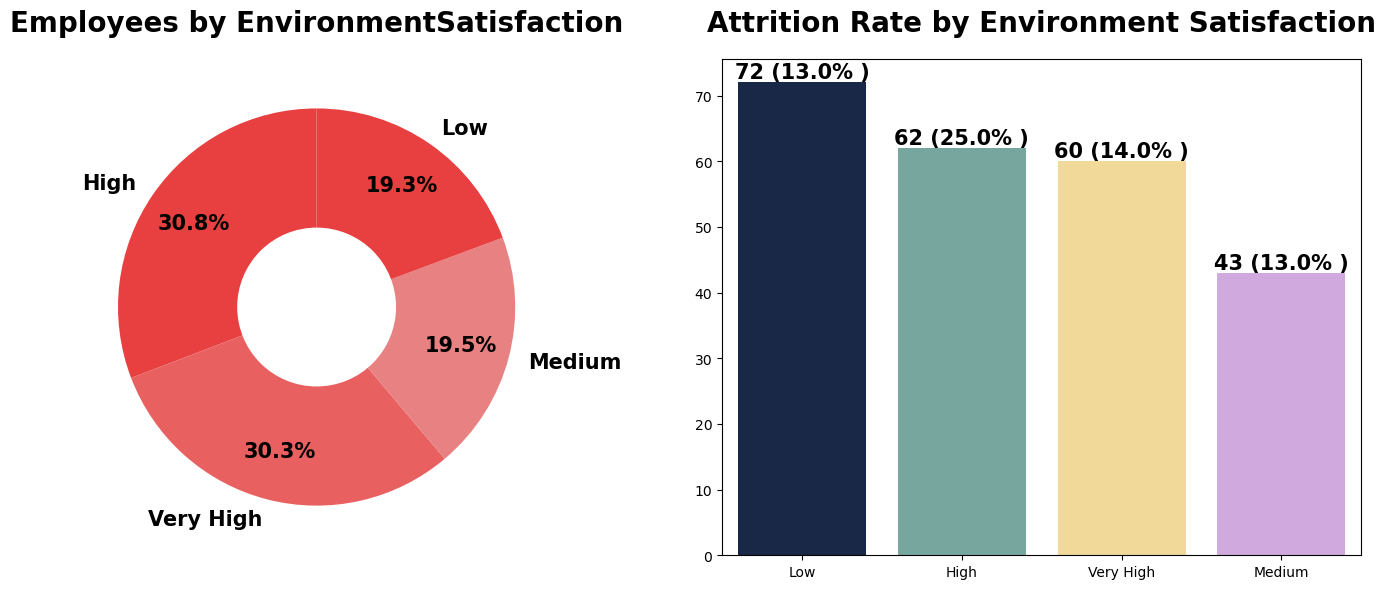

In [48]:
#Visualization to show Total Employees by EnvironmentSatisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["EnvironmentSatisfaction"].value_counts()
plt.title("Employees by EnvironmentSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by EnvironmentSatisfaction.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["EnvironmentSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Environment Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

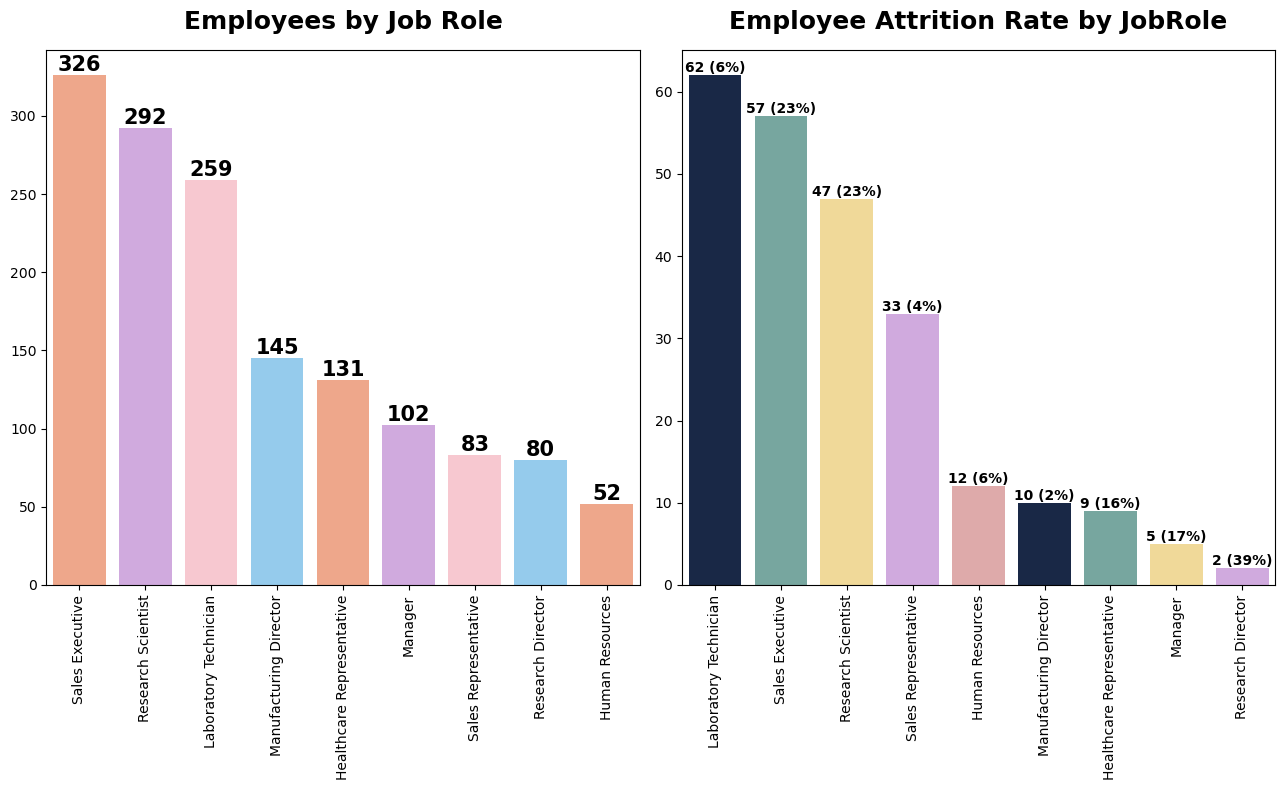

In [49]:
##Visualization to show Total Employees by JobRole.
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
value_1 = employee_data["JobRole"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Job Role",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Attrition Rate by JobRole.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=10)
plt.tight_layout()
plt.show()

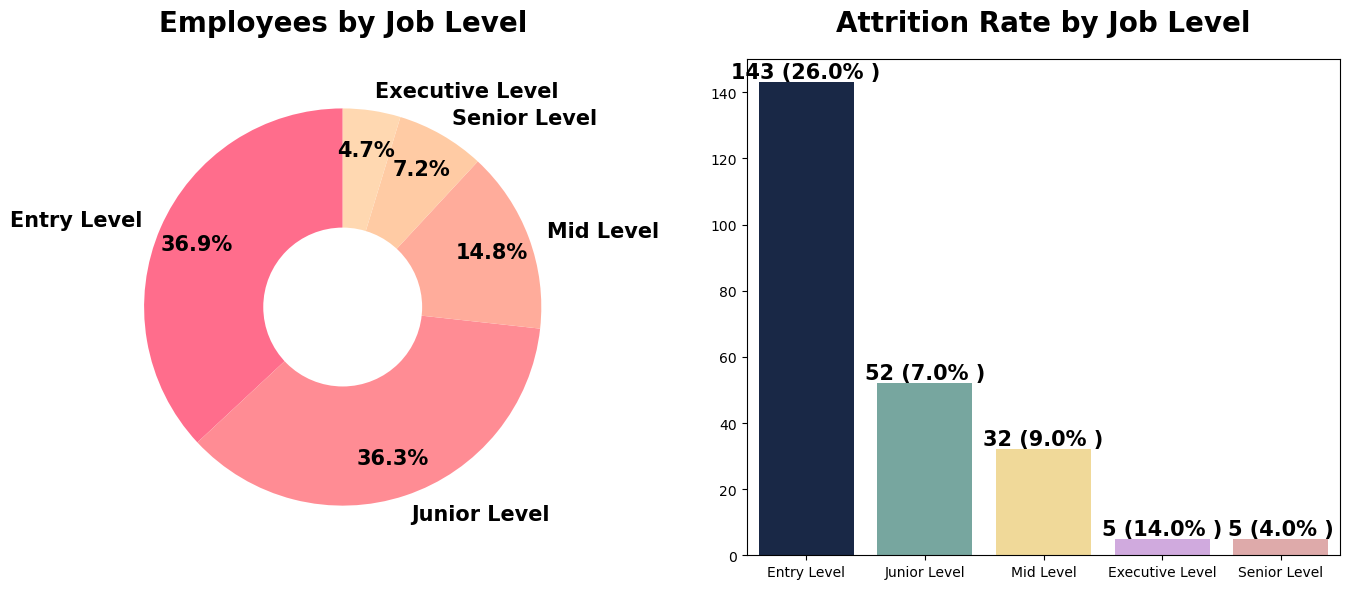

In [50]:
#Visualization to show Total Employees by Job Level.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["JobLevel"].value_counts()
plt.title("Employees by Job Level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4',"#FFD8B1"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
#Visualization to show Attrition Rate by JobLevel.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["JobLevel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

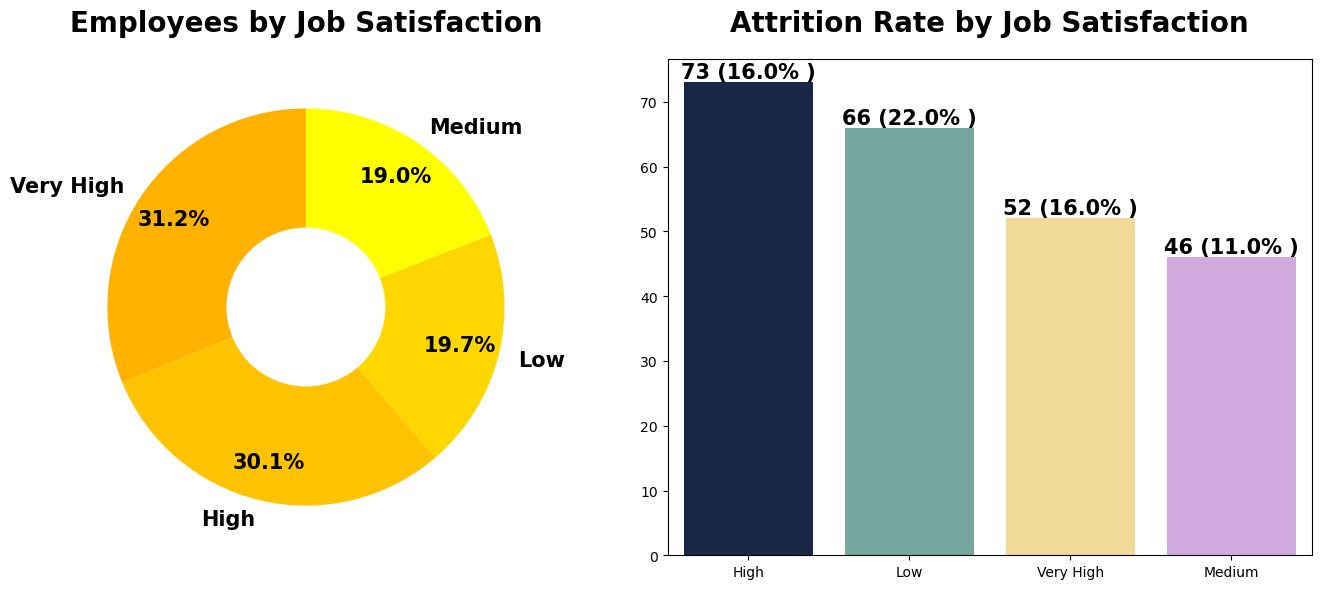

In [51]:
#Visualization to show Total Employees by Job Satisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["JobSatisfaction"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by Job Satisfaction.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["JobSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

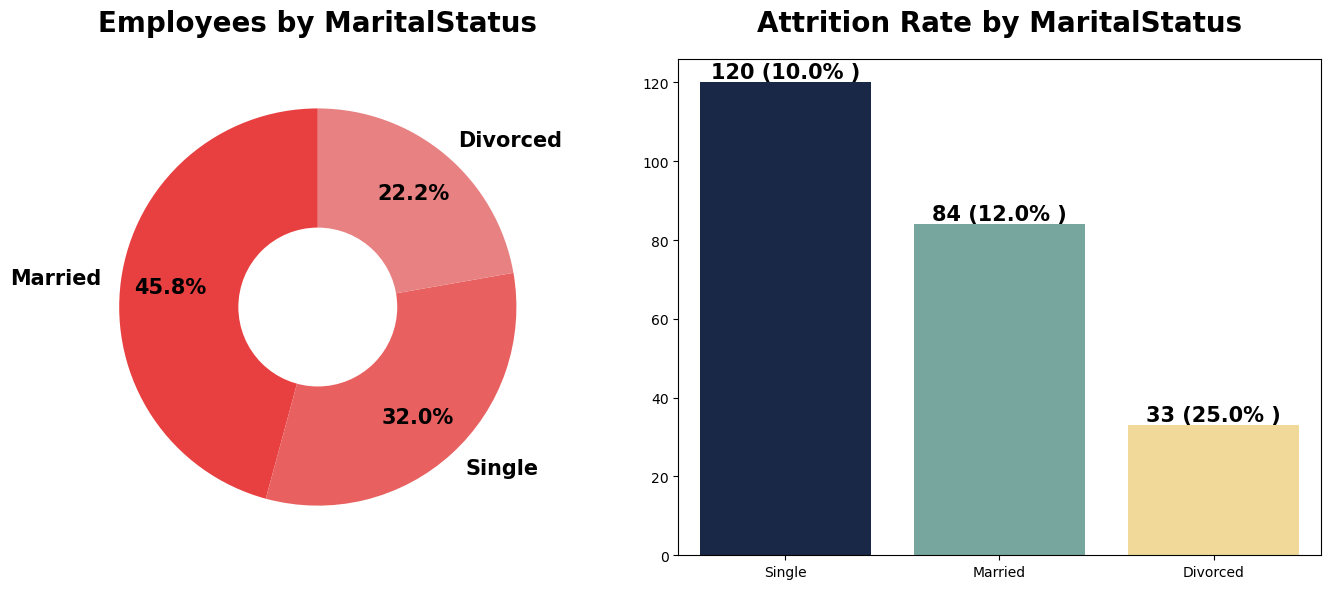

In [52]:
#Visualization to show Total Employees by MaritalStatus.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["MaritalStatus"].value_counts()
plt.title("Employees by MaritalStatus", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by MaritalStatus.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["MaritalStatus"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by MaritalStatus",
          fontweight="black",
          size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

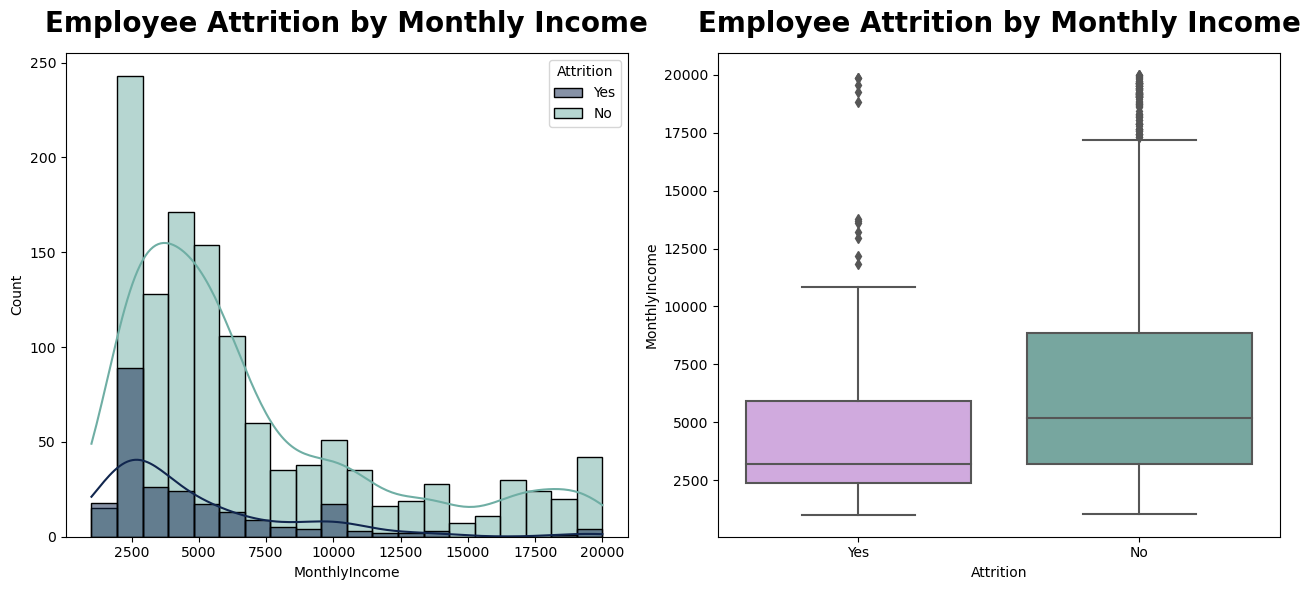

In [53]:
#Visualization to show Employee Distribution by MonthlyIncome.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=employee_data,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)

#Visualization to show Employee Attrition by Monthly Income.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=employee_data,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

In [54]:
employee_data["NumCompaniesWorked"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [55]:
bin_edges = [0, 1, 3, 5, 10]

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]

# Cut the DailyRate column into groups
employee_data["NumCompaniesWorkedGroup"] = pd.cut(employee_data['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

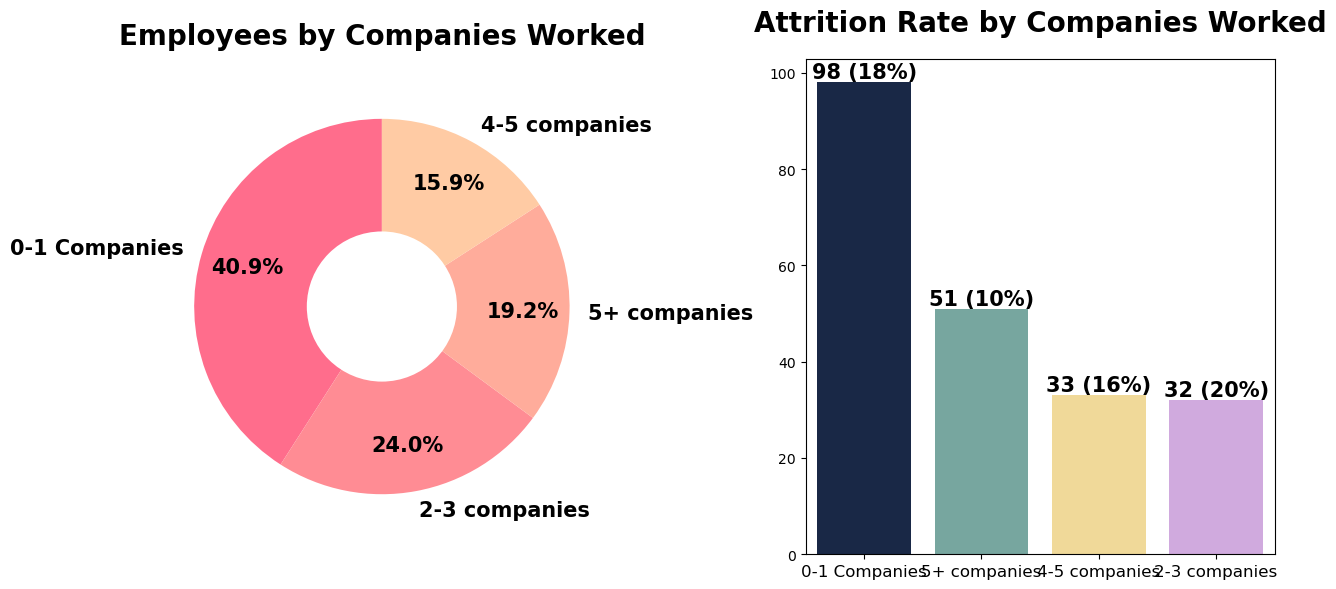

In [56]:
#Visualization to show Total Employees by NumCompaniesWorked.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = employee_data["NumCompaniesWorkedGroup"].value_counts()
plt.title("Employees by Companies Worked", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
 
#Visualization to show Attrition Rate by NumCompaniesWorked.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["NumCompaniesWorkedGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Companies Worked",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=12)
plt.tight_layout()
plt.show()

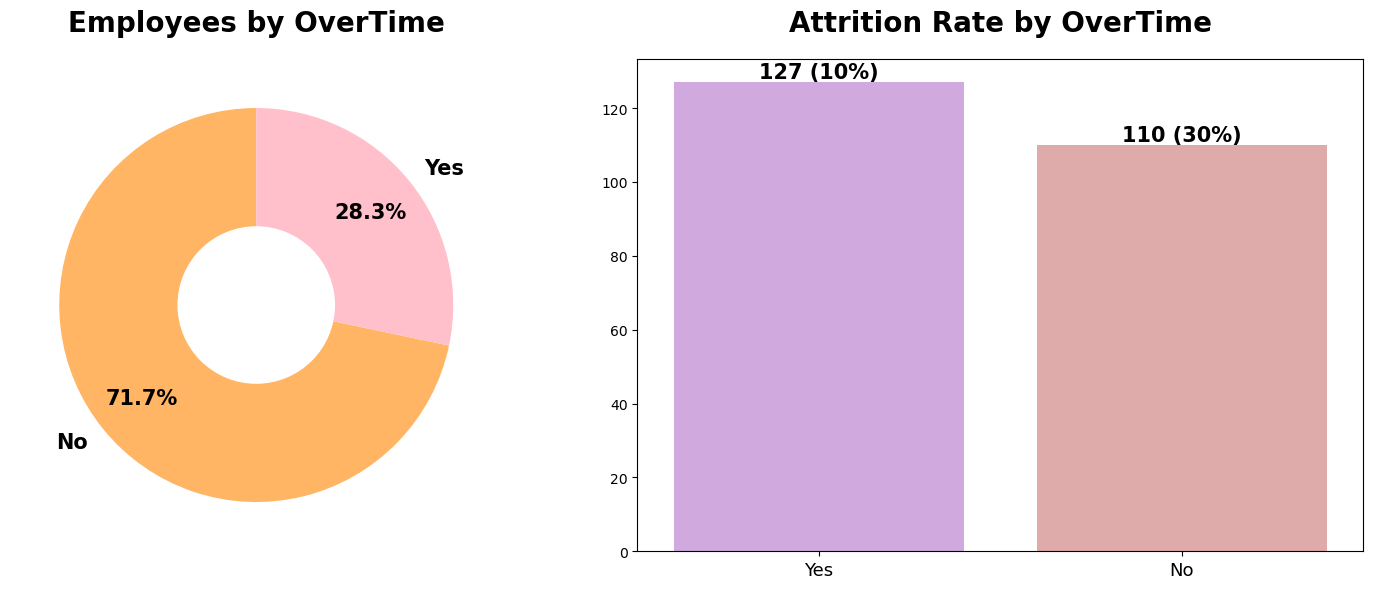

In [57]:
#Visualization to show Total Employees by OverTime.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = employee_data["OverTime"].value_counts()
plt.title("Employees by OverTime", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by OverTime.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["OverTime"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by OverTime",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=13)
plt.tight_layout()
plt.show()

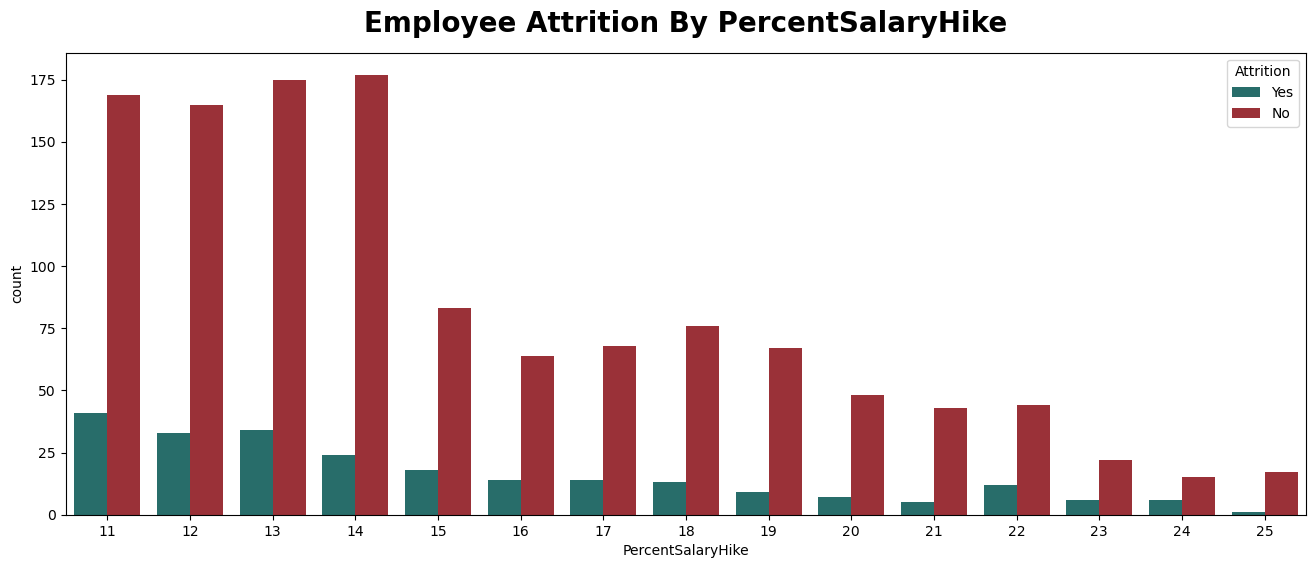

In [58]:
#Visualization to show Employee Distribution by Percentage Salary Hike.
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=employee_data, palette=["#1d7874","#AC1F29"])
plt.title("Employee Attrition By PercentSalaryHike",fontweight="black",size=20,pad=15)
plt.show()

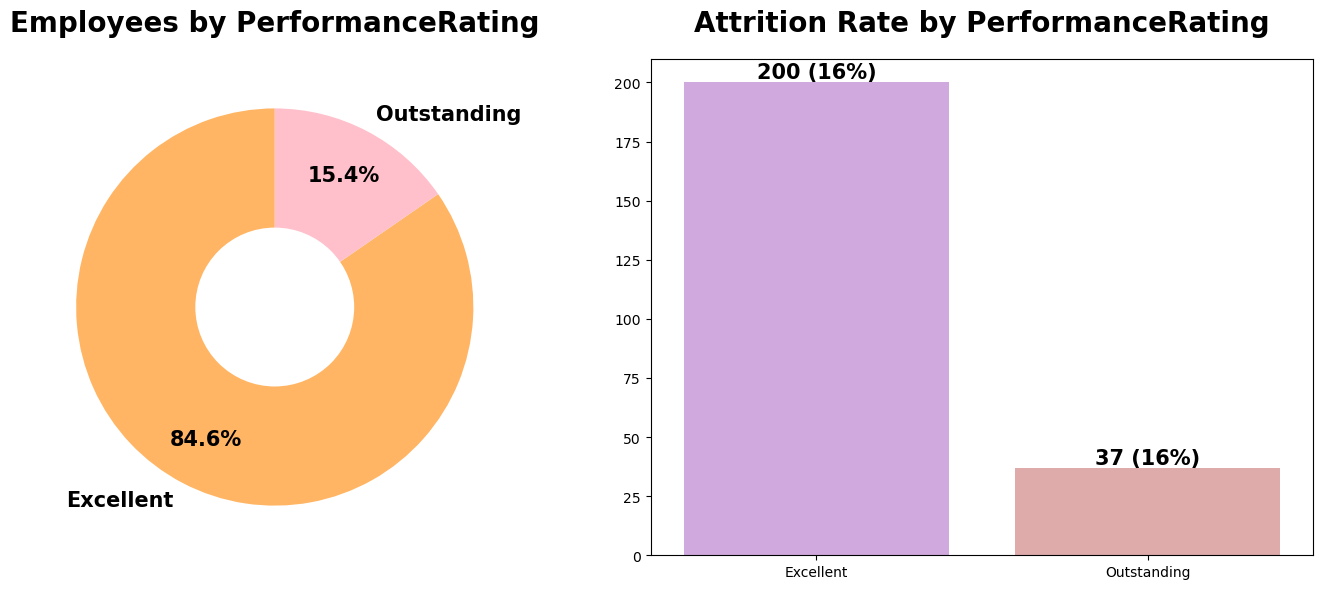

In [59]:
#Visualization to show Total Employees by PerformanceRating.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["PerformanceRating"].value_counts()
plt.title("Employees by PerformanceRating", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
  
#Visualization to show Attrition Rate by PerformanceRating.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["PerformanceRating"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by PerformanceRating",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

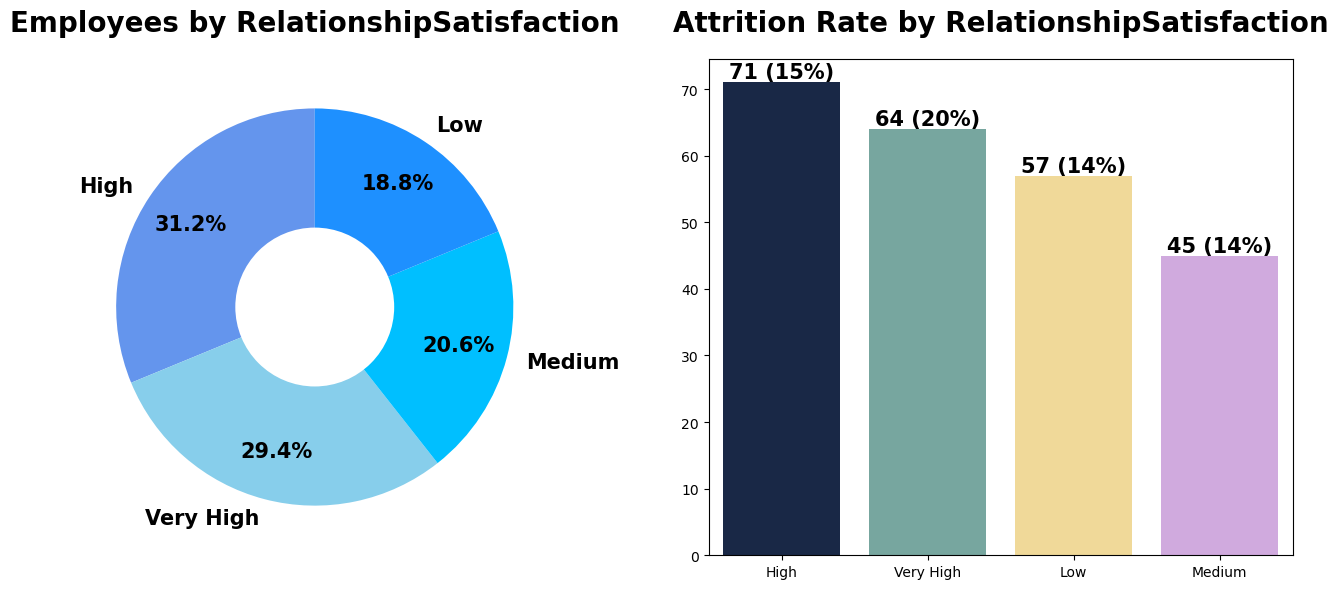

In [60]:
#Visualization to show Total Employees by RelationshipSatisfaction.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = employee_data["RelationshipSatisfaction"].value_counts()
plt.title("Employees by RelationshipSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by RelationshipSatisfaction.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["RelationshipSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by RelationshipSatisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

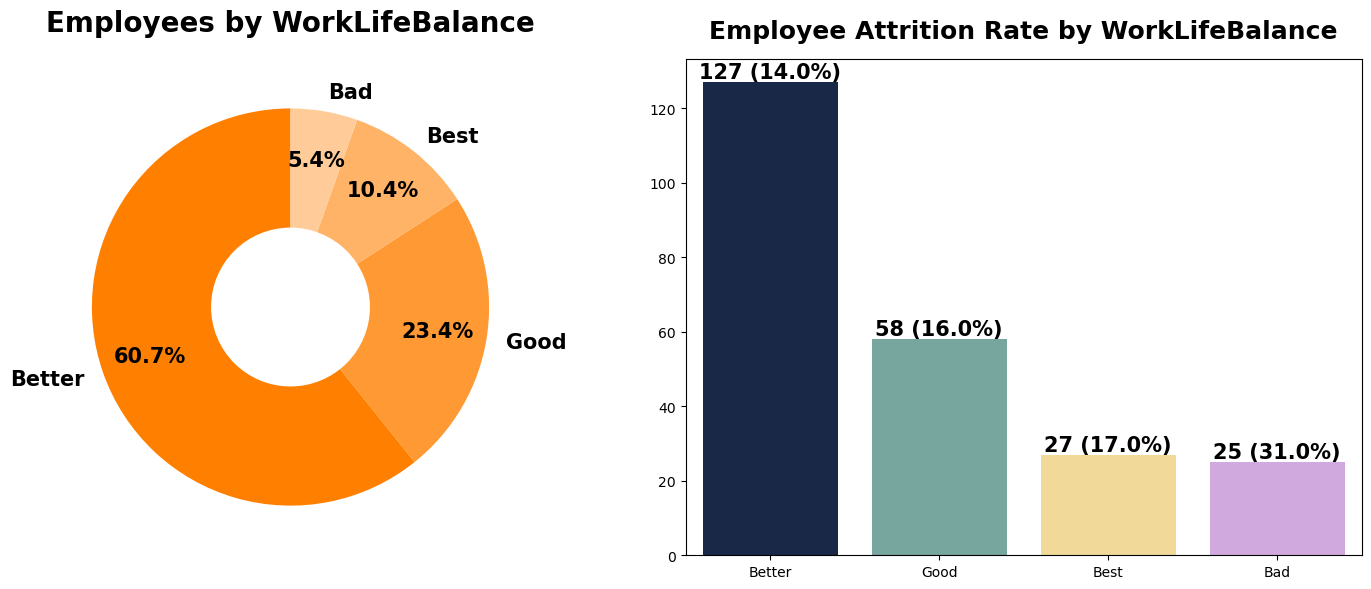

In [61]:
##Visualization to show Total Employees by WorkLifeBalance.
plt.figure(figsize=(14.5,6))
plt.subplot(1,2,1)
value_1 = employee_data["WorkLifeBalance"].value_counts()
plt.title("Employees by WorkLifeBalance", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by WorkLifeBalance.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["WorkLifeBalance"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by WorkLifeBalance",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=15)
plt.tight_layout()
plt.show()

In [62]:
# Define the bin edges for the groups
bin_edges = [0, 5, 10, 20, 50]

# Define the labels for the groups
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]

# Cut the DailyRate column into groups
employee_data["TotalWorkingYearsGroup"] = pd.cut(employee_data['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

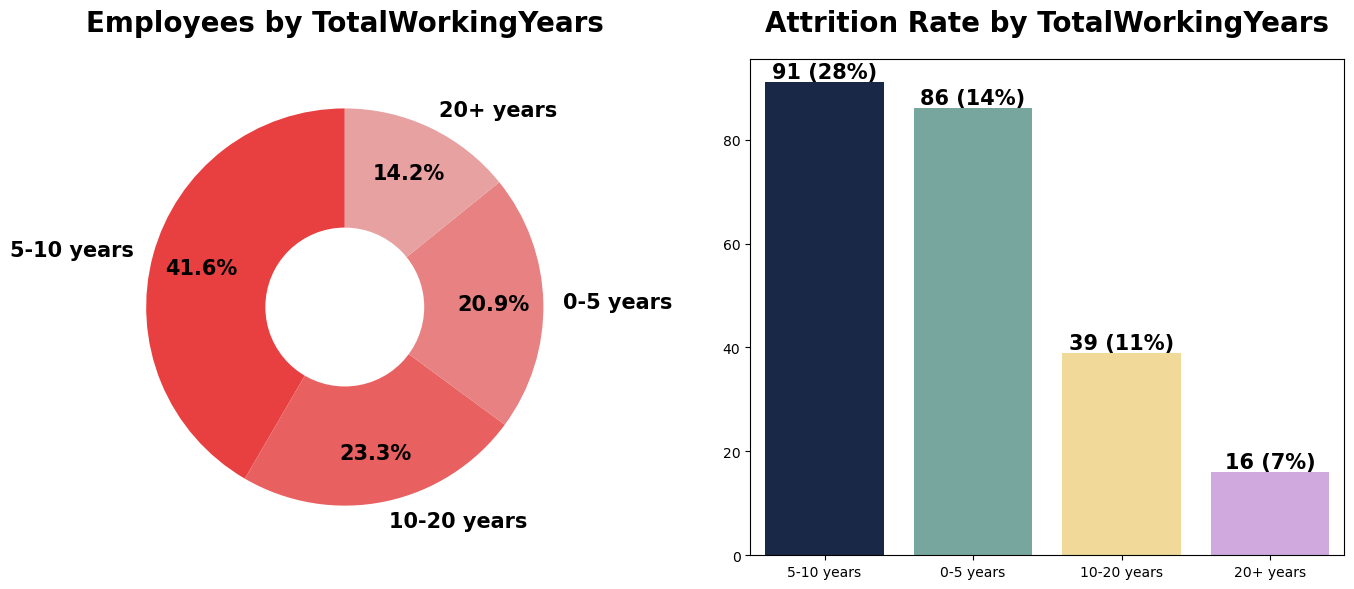

In [63]:
#Visualization to show Total Employees by TotalWorkingYearsGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by TotalWorkingYearsGroup.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by TotalWorkingYears",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [64]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
employee_data["YearsAtCompanyGroup"] = pd.cut(employee_data['YearsAtCompany'], bins=bin_edges, labels=bin_labels)

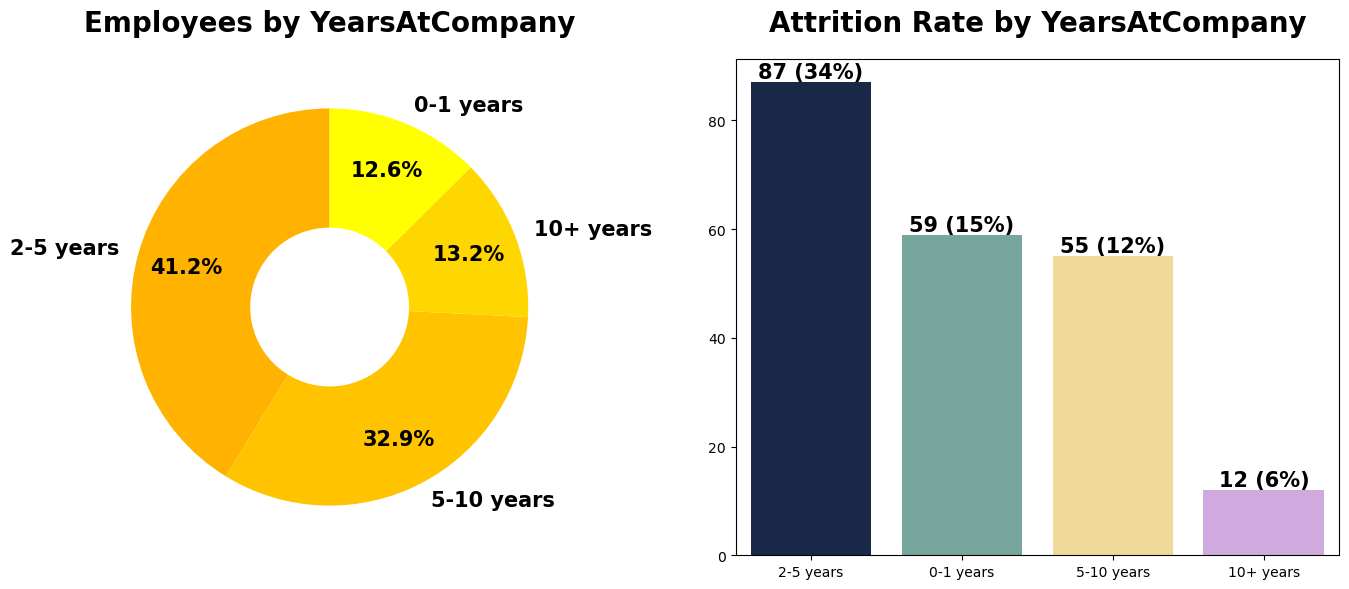

In [65]:
#Visualization to show Total Employees by YearsAtCompanyGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["YearsAtCompanyGroup"].value_counts()
plt.title("Employees by YearsAtCompany", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsAtCompanyGroup.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["YearsAtCompanyGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsAtCompany",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [66]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
employee_data["YearsInCurrentRoleGroup"] = pd.cut(employee_data['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)

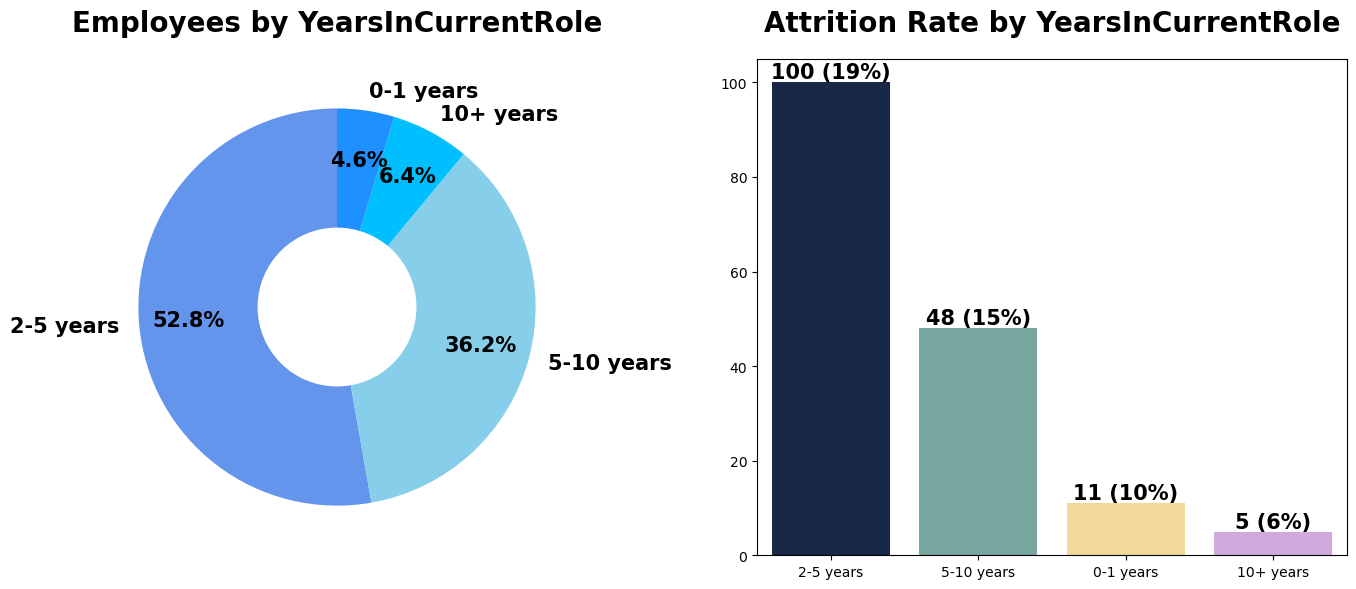

In [67]:
#Visualization to show Total Employees by YearsInCurrentRoleGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["YearsInCurrentRoleGroup"].value_counts()
plt.title("Employees by YearsInCurrentRole", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15,"color":"black"})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
   
#Visualization to show Attrition Rate by YearsInCurrentRoleGroup.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["YearsInCurrentRoleGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette= ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsInCurrentRole",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

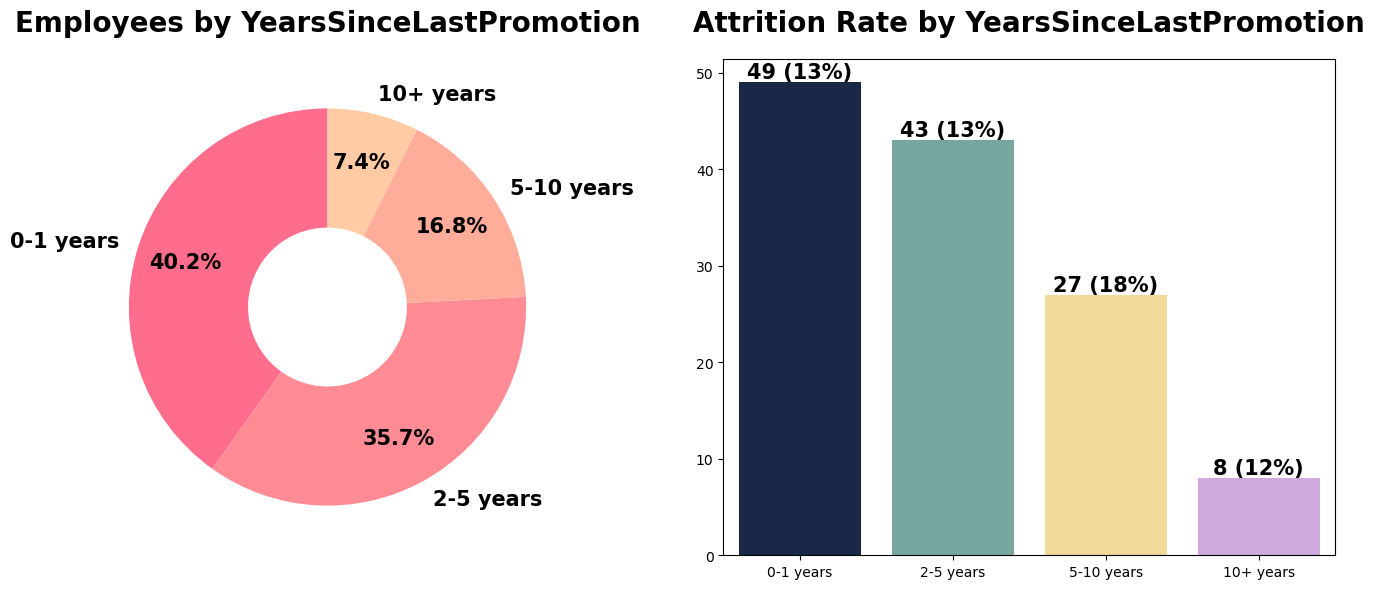

In [68]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
employee_data["YearsSinceLastPromotionGroup"] = pd.cut(employee_data['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)
#Visualization to show Total Employees by YearsSinceLastPromotionGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["YearsSinceLastPromotionGroup"].value_counts()
plt.title("Employees by YearsSinceLastPromotion", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
    
#Visualization to show Attrition Rate by YearsSinceLastPromotionGroup.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["YearsSinceLastPromotionGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

plt.title("Attrition Rate by YearsSinceLastPromotion",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

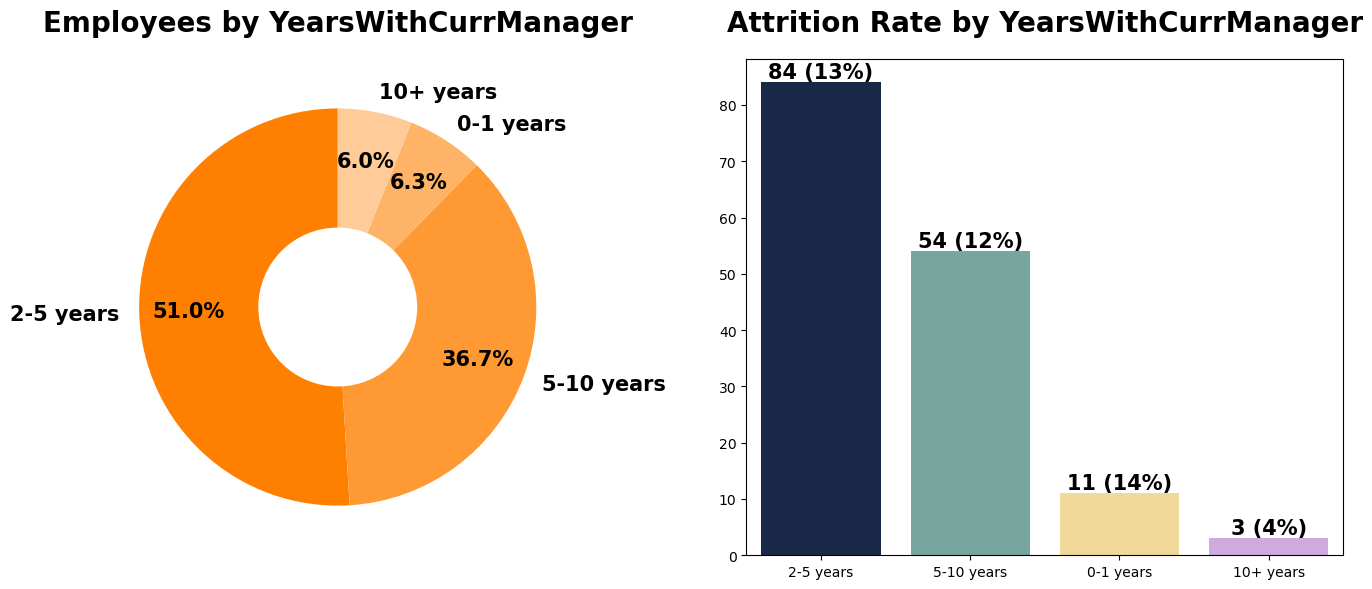

In [69]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
employee_data["YearsWithCurrManagerGroup"] = pd.cut(employee_data['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)
#Visualization to show Total Employees by YearsWithCurrManagerGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data["YearsWithCurrManagerGroup"].value_counts()
plt.title("Employees by YearsWithCurrManager", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsWithCurrManagerGroup.
plt.subplot(1,2,2)
new_df = employee_data[employee_data["Attrition"]=="Yes"]
value_2 = new_df["YearsWithCurrManagerGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsWithCurrManager",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [71]:
num_cols = employee_data.select_dtypes(np.number).columns

In [72]:
new_df = employee_data.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [73]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

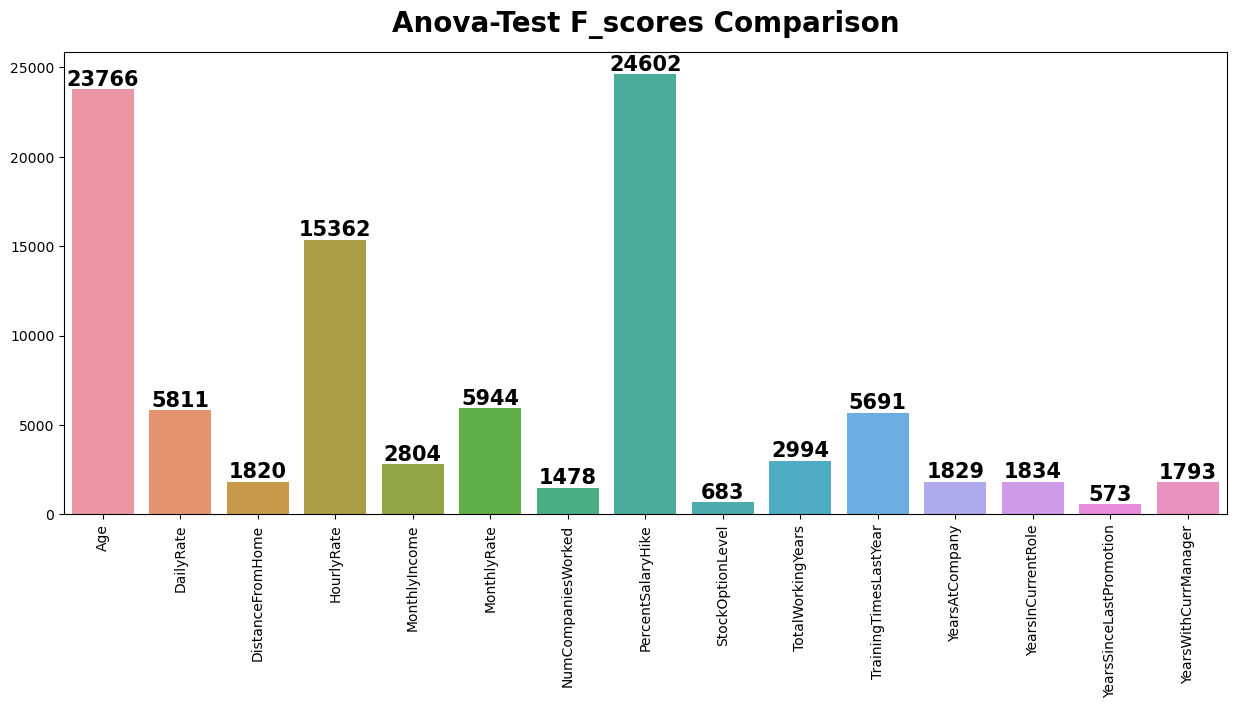

In [74]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

In [75]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
test_df

,Features,F_Score,P_value
0,Age,23766.934042,0.00000000000000000000
1,DailyRate,5811.796569,0.00000000000000000000
2,DistanceFromHome,1820.614585,0.00000000000000000000
3,HourlyRate,15362.122371,0.00000000000000000000
4,MonthlyIncome,2804.459632,0.00000000000000000000
5,MonthlyRate,5944.089071,0.00000000000000000000
6,NumCompaniesWorked,1478.188633,0.00000000000000000000
7,PercentSalaryHike,24602.507947,0.00000000000000000000
8,StockOptionLevel,683.069576,0.00000000000000000000
9,TotalWorkingYears,2994.906310,0.00000000000000000000


In [76]:
cat_cols = employee_data.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(employee_data[col], employee_data['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

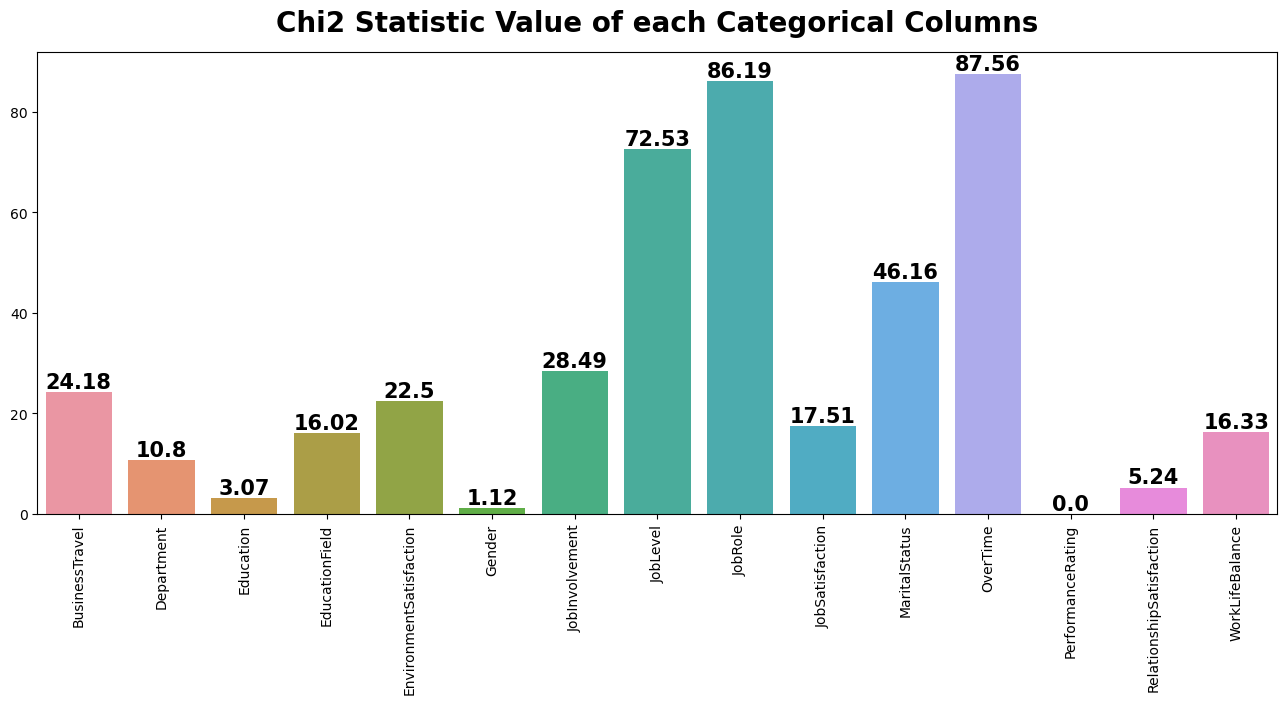

In [77]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

In [78]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [79]:
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,Education,3.073961,0.54552533765659494414
3,EducationField,16.024674,0.00677398013902521211
4,EnvironmentSatisfaction,22.503881,0.00005123468906289433
5,Gender,1.116967,0.29057244902890855265
6,JobInvolvement,28.492021,0.00000286318063671342
7,JobLevel,72.529013,0.00000000000000663468
8,JobRole,86.190254,0.00000000000000275248
9,JobSatisfaction,17.505077,0.00055630045103875563


# Modelling

In [81]:
label = LabelEncoder()
employee_data["Attrition"] = label.fit_transform(employee_data.Attrition)

In [82]:
 employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           1470 non-null   int64   
 1   Attrition                     1470 non-null   int32   
 2   BusinessTravel                1470 non-null   object  
 3   DailyRate                     1470 non-null   int64   
 4   Department                    1470 non-null   object  
 5   DistanceFromHome              1470 non-null   int64   
 6   Education                     1470 non-null   object  
 7   EducationField                1470 non-null   object  
 8   EnvironmentSatisfaction       1470 non-null   object  
 9   Gender                        1470 non-null   object  
 10  HourlyRate                    1470 non-null   int64   
 11  JobInvolvement                1470 non-null   object  
 12  JobLevel                      1470 non-null   ob

In [83]:
# Transform categorical data into dummies
dummy_col = [column for column in employee_data.drop('Attrition', axis=1).columns if employee_data[column].nunique() < 20]
data = pd.get_dummies(employee_data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 159 entries, Age to YearsWithCurrManagerGroup_10+ years
dtypes: int32(1), int64(8), uint8(150)
memory usage: 313.1 KB


In [84]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 159)
(1470, 159)


<Axes: >

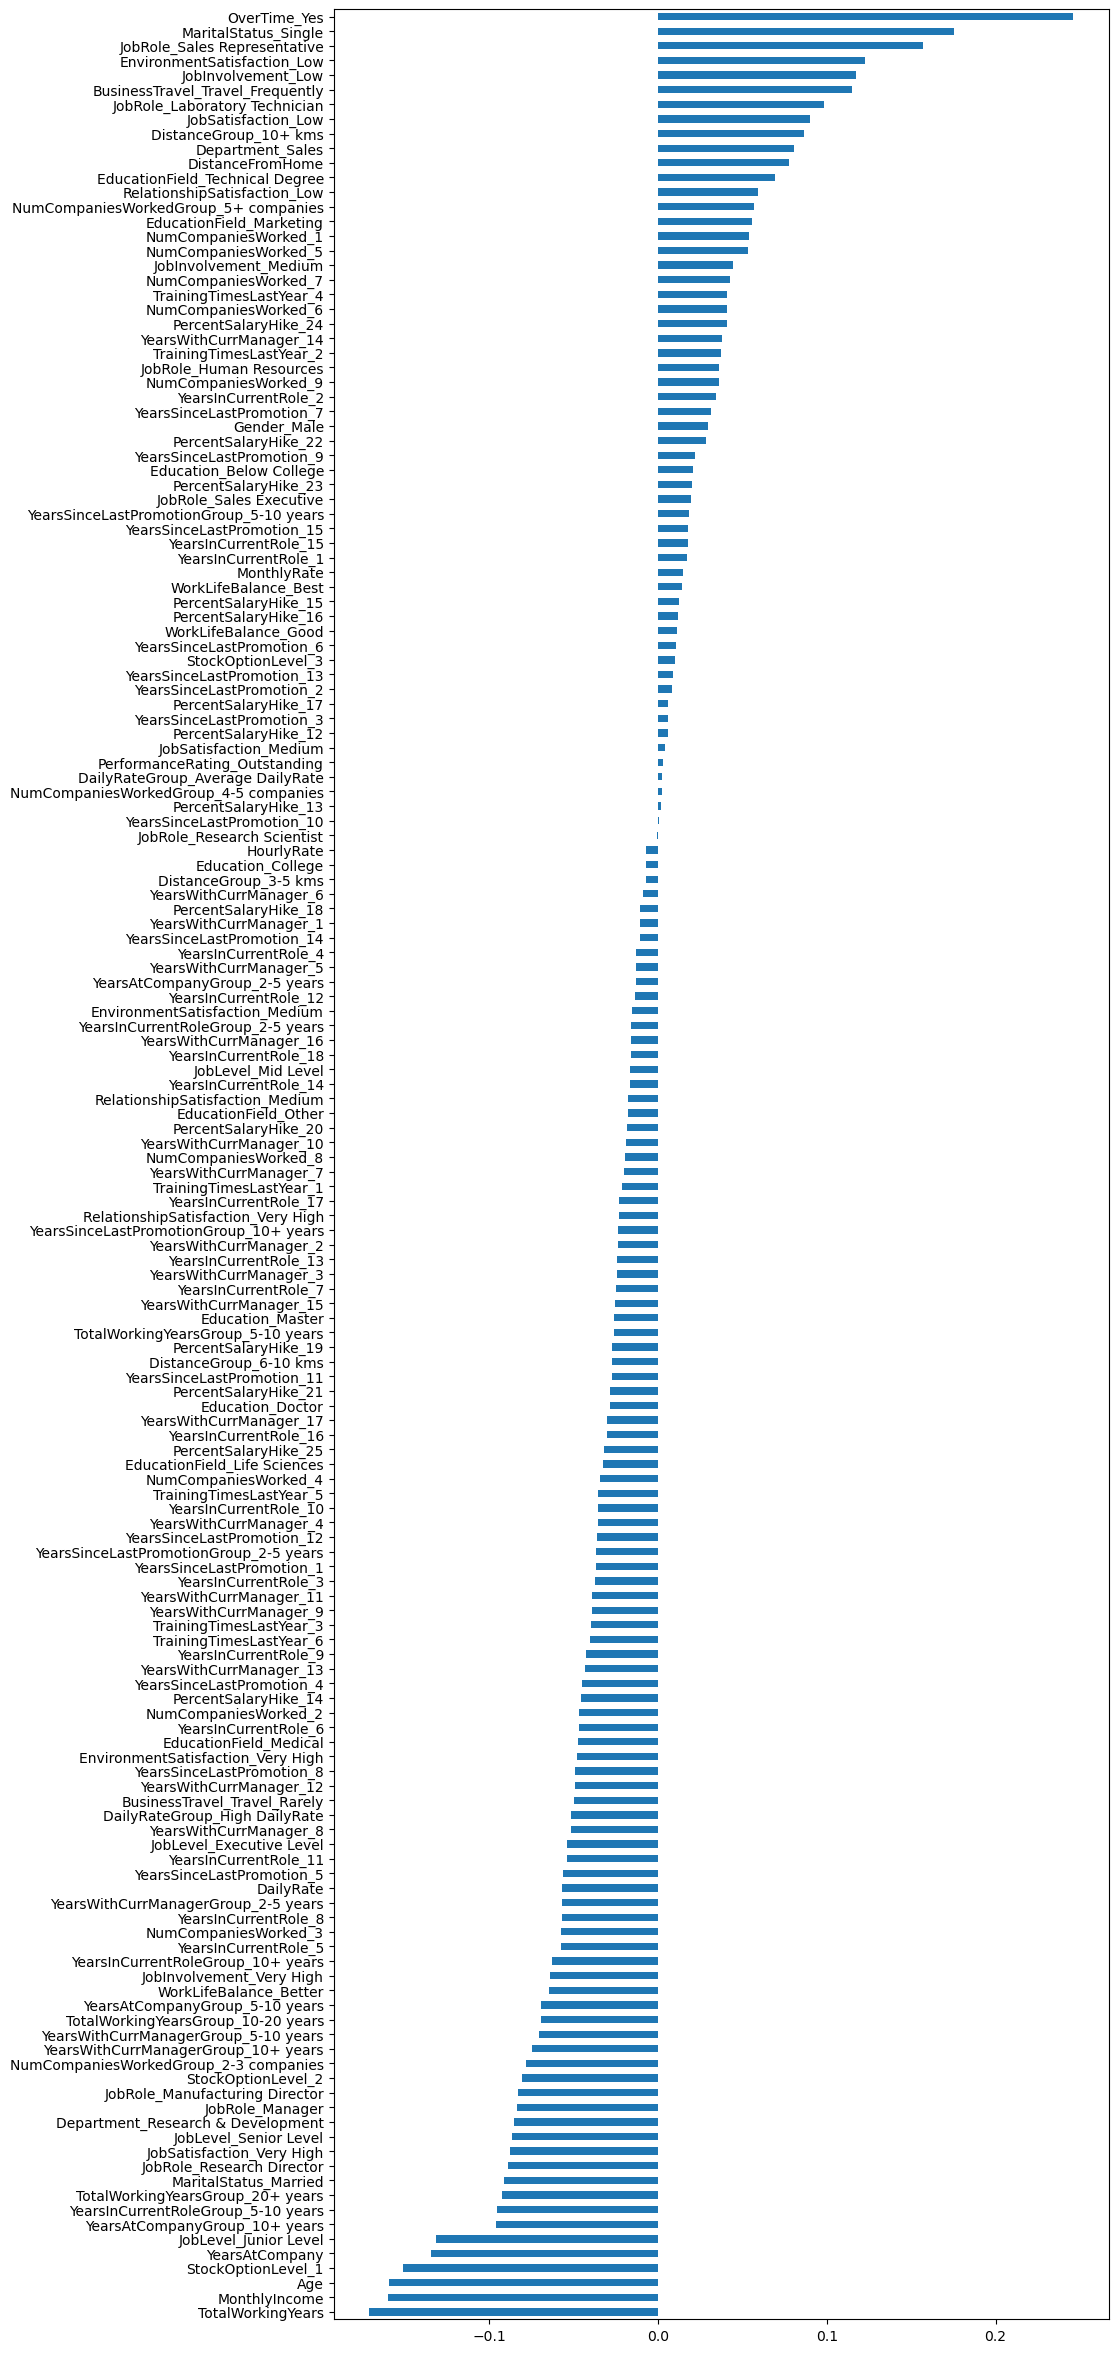

In [85]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [86]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

111

In [87]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [88]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [89]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [90]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [91]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logistic Regression

In [92]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[848  15]
 [ 59 107]]
ACCURACY SCORE:
0.9281
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.934950    0.877049  0.928086     0.906000      0.925610
recall       0.982619    0.644578  0.928086     0.813599      0.928086
f1-score     0.958192    0.743056  0.928086     0.850624      0.923486
support    863.000000  166.000000  0.928086  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  20]
 [ 41  30]]
ACCURACY SCORE:
0.8617
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.895141   0.600000  0.861678    0.747570      0.847624
recall       0.945946   0.422535  0.861678    0.684241      0.861678
f1-score     0.919842   0.495868  0.861678    0.707855      0.851583
support    370.000000  71.000000  0.861678  441.000000    441.000000


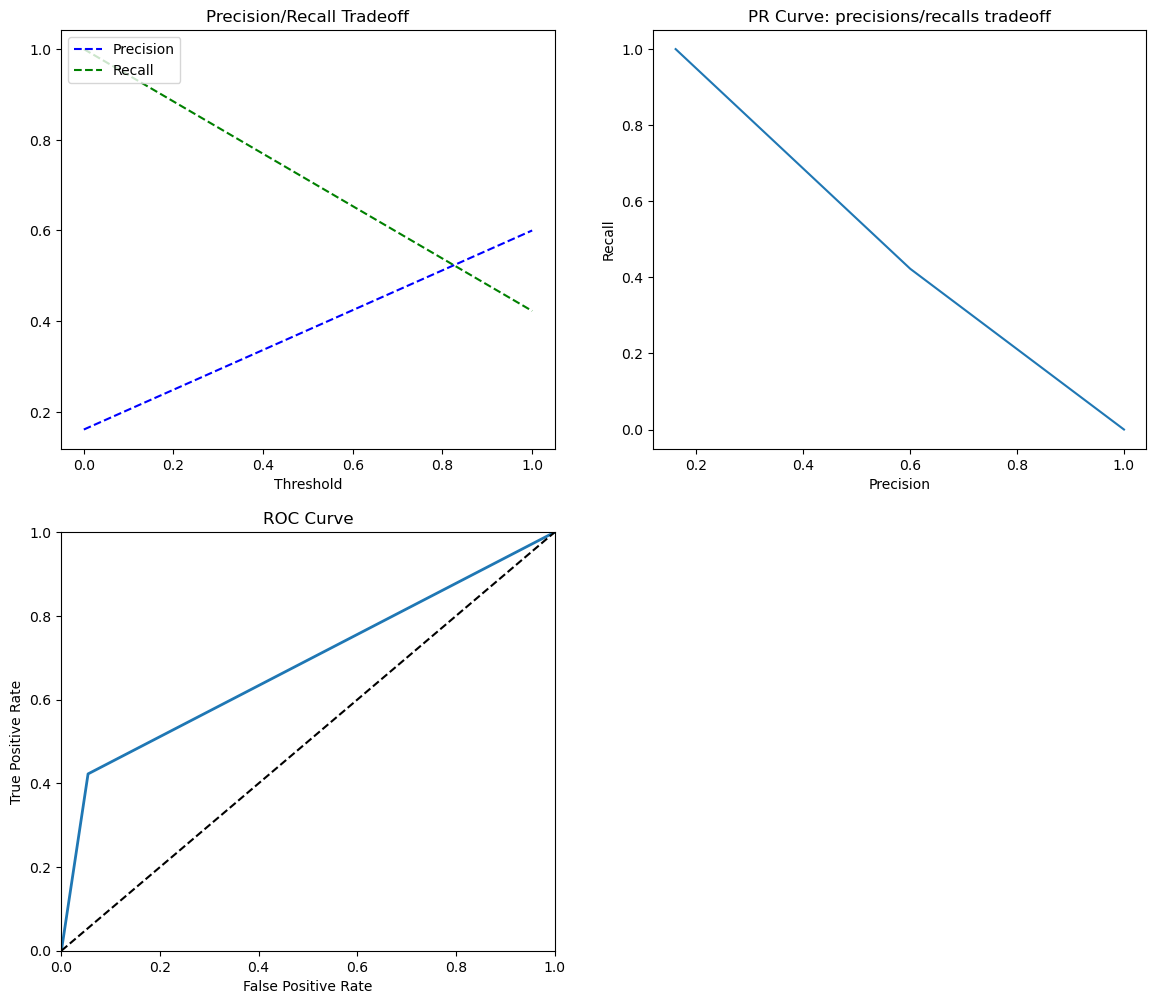

In [93]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [94]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

# RANDOM FOREST CLASSIFIER

In [95]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 62   9]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.853428   0.500000  0.839002    0.676714      0.796527
recall       0.975676   0.126761  0.839002    0.551218      0.839002
f1-score     0.910467   0.202247  0.839002    0.556357      0.796445
support    370.000000  71.000000  0.839002  441.000000    441.000000


In [97]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 61 105]]
ACCURACY SCORE:
0.9407
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.933983    1.000000  0.940719     0.966991      0.944633
recall       1.000000    0.632530  0.940719     0.816265      0.940719
f1-score     0.965865    0.774908  0.940719     0.870386      0.935059
support    863.000000  166.000000  0.940719  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[365   5]
 [ 65   6]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.848837   0.545455   0.84127    0.697146      0.799993
recall       0.986486   0.084507   0.84127    0.535497      0.841270
f1-score     0.912500   0.146341   0.84127    0.529421      0.789150
support    370.000000  71.000000   0.84127  441.000000    441.000000


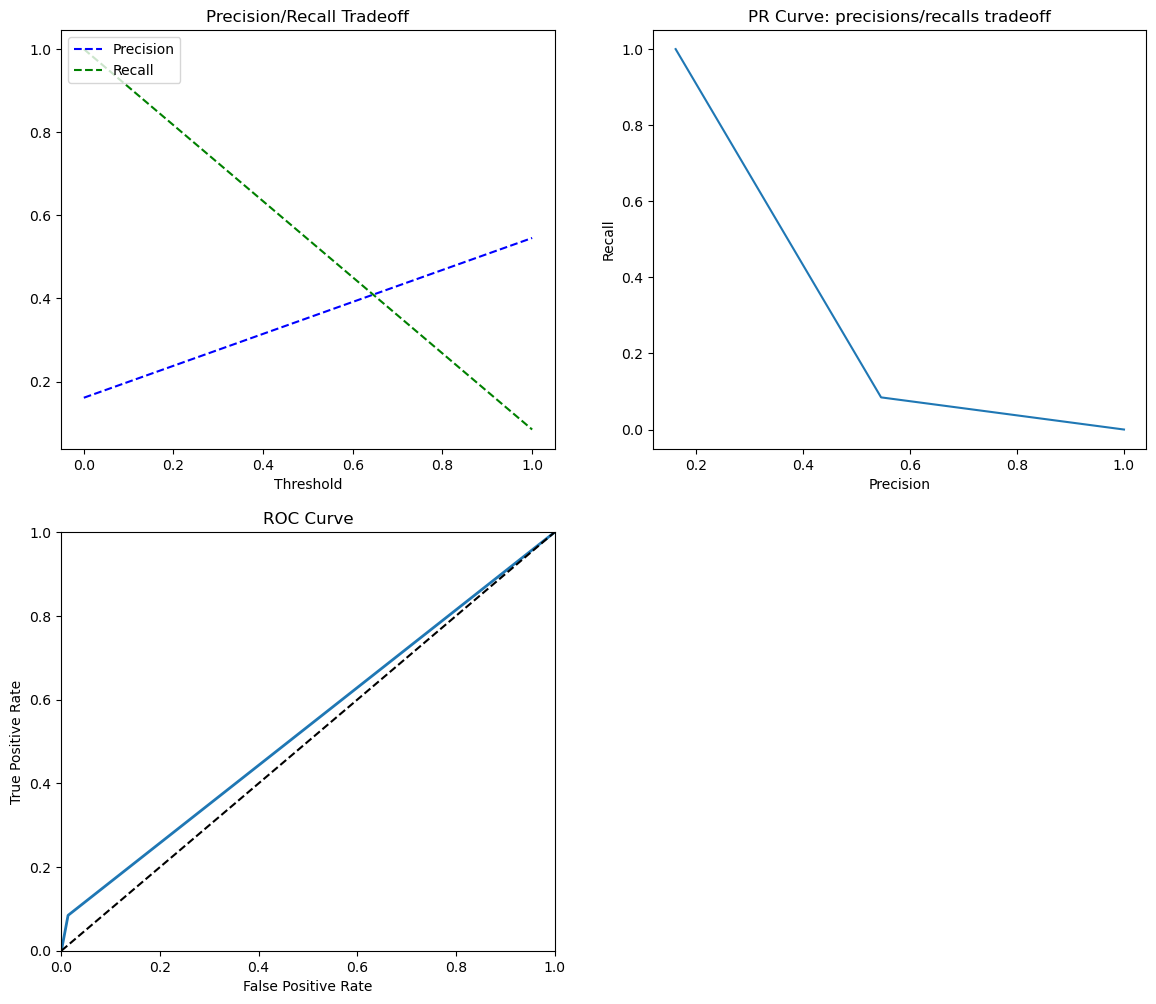

In [98]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [99]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

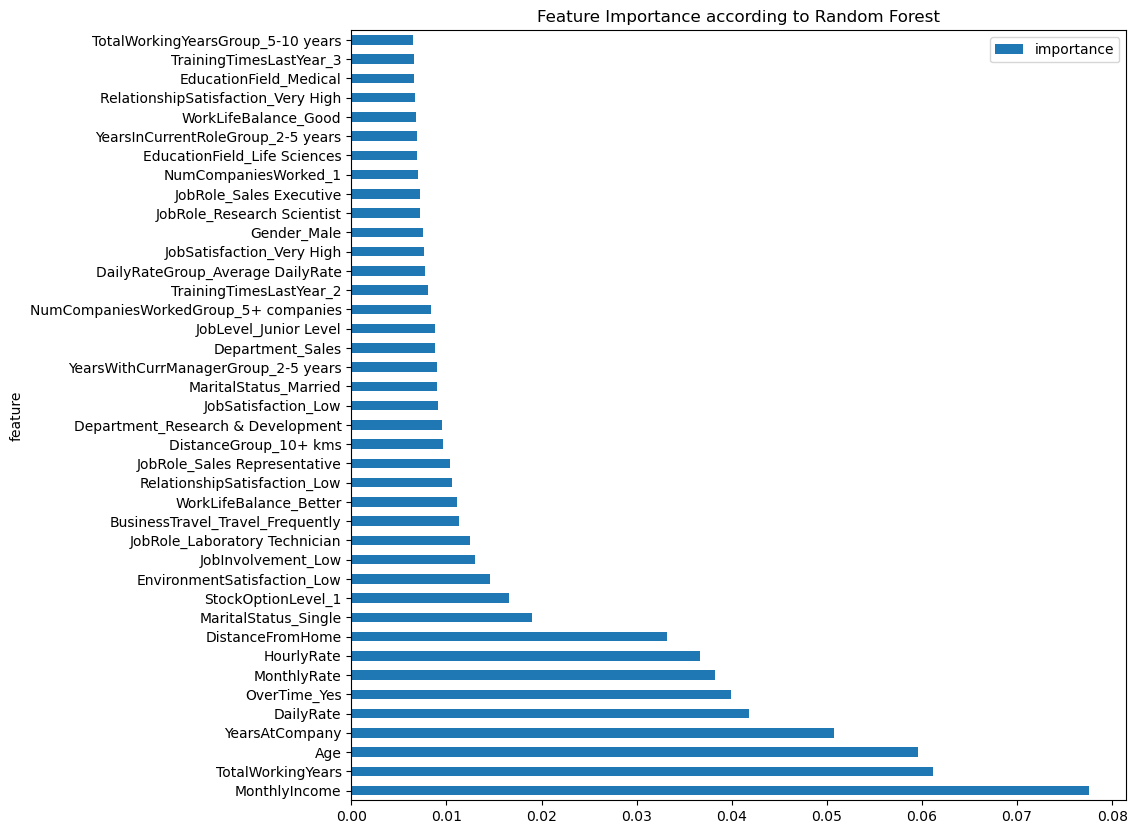

In [100]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

# SUPPORT VECTOR MACHINE

In [101]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 49 117]]
ACCURACY SCORE:
0.9446
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.945796    0.936000  0.944606     0.940898      0.944216
recall       0.990730    0.704819  0.944606     0.847775      0.944606
f1-score     0.967742    0.804124  0.944606     0.885933      0.941347
support    863.000000  166.000000  0.944606  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 46  25]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.882653   0.510204   0.84127    0.696429      0.822690
recall       0.935135   0.352113   0.84127    0.643624      0.841270
f1-score     0.908136   0.416667   0.84127    0.662402      0.829011
support    370.000000  71.000000   0.84127  441.000000    441.000000


In [102]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [103]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[860   3]
 [ 57 109]]
ACCURACY SCORE:
0.9417
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.937841    0.973214  0.941691     0.955528      0.943547
recall       0.996524    0.656627  0.941691     0.826575      0.941691
f1-score     0.966292    0.784173  0.941691     0.875232      0.936912
support    863.000000  166.000000  0.941691  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[356  14]
 [ 48  23]]
ACCURACY SCORE:
0.8594
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.881188   0.621622   0.85941    0.751405      0.839399
recall       0.962162   0.323944   0.85941    0.643053      0.859410
f1-score     0.919897   0.425926   0.85941    0.672911      0.840368
support    370.000000  71.000000   0.85941  441.000000    441.000000


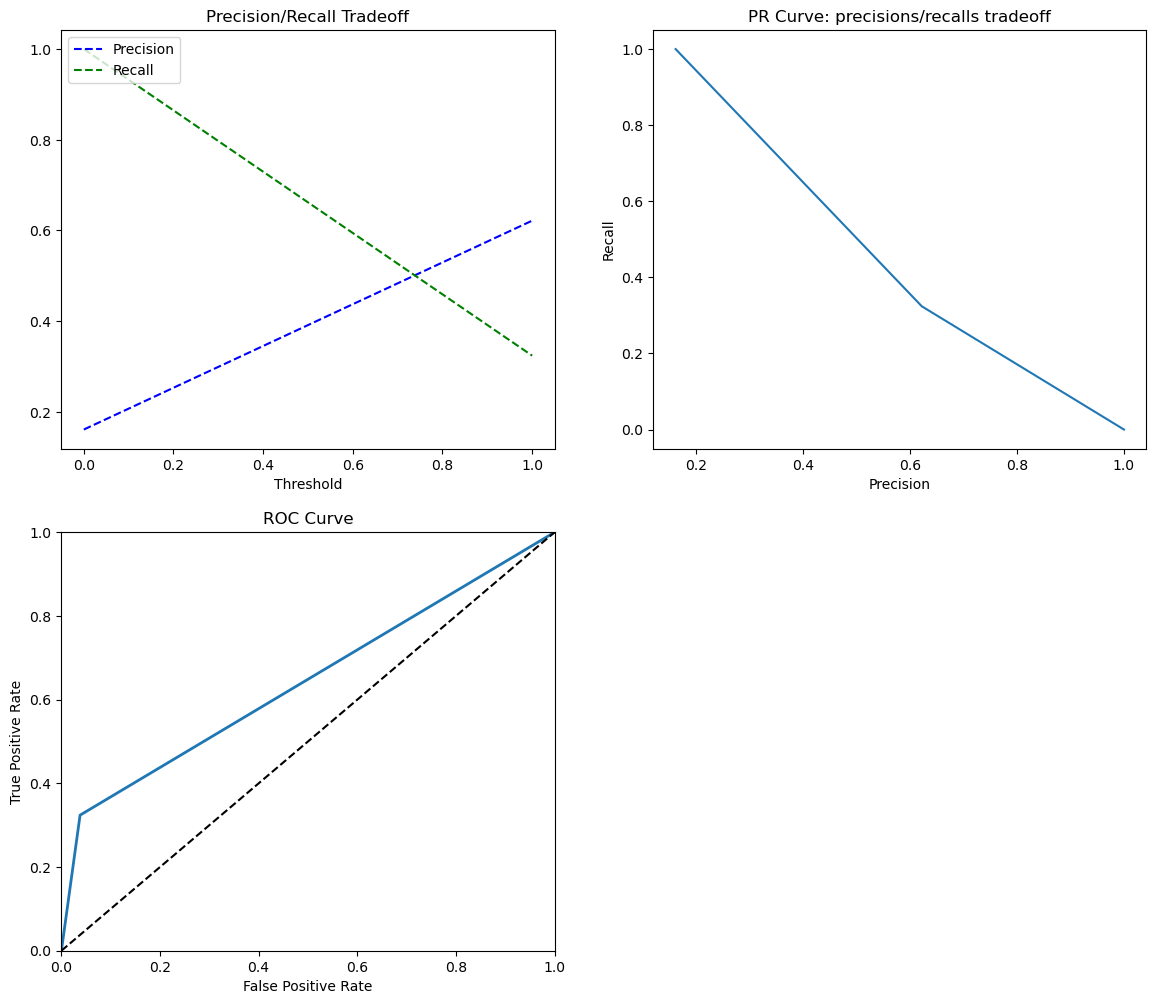

In [104]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [105]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

In [106]:
# XGBOOST CLASSIFIER

In [107]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 52  19]]
ACCURACY SCORE:
0.8594
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.873786   0.655172   0.85941    0.764479      0.838590
recall       0.972973   0.267606   0.85941    0.620289      0.859410
f1-score     0.920716   0.380000   0.85941    0.650358      0.833662
support    370.000000  71.000000   0.85941  441.000000    441.000000


In [108]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

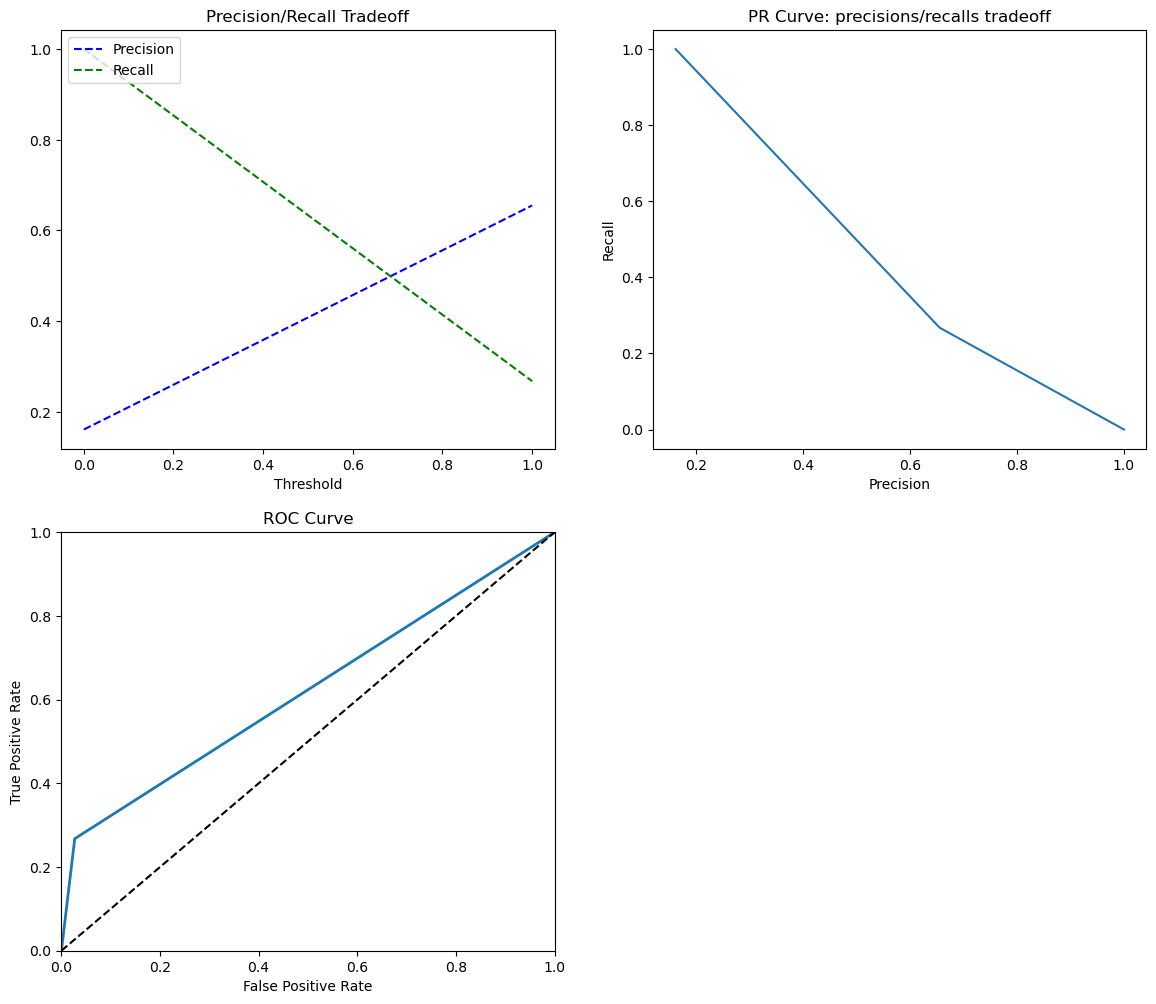

In [109]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

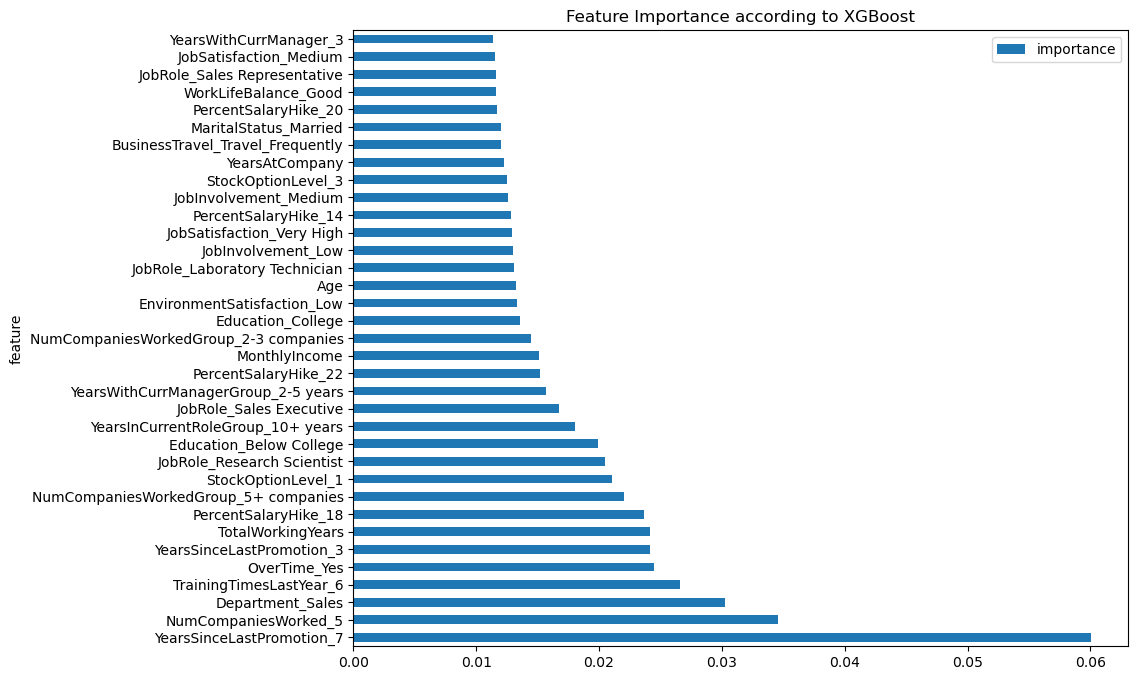

In [110]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

In [111]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.535
XGBOOST                        roc_auc_score: 0.620
LOGISTIC REGRESSION            roc_auc_score: 0.542
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500


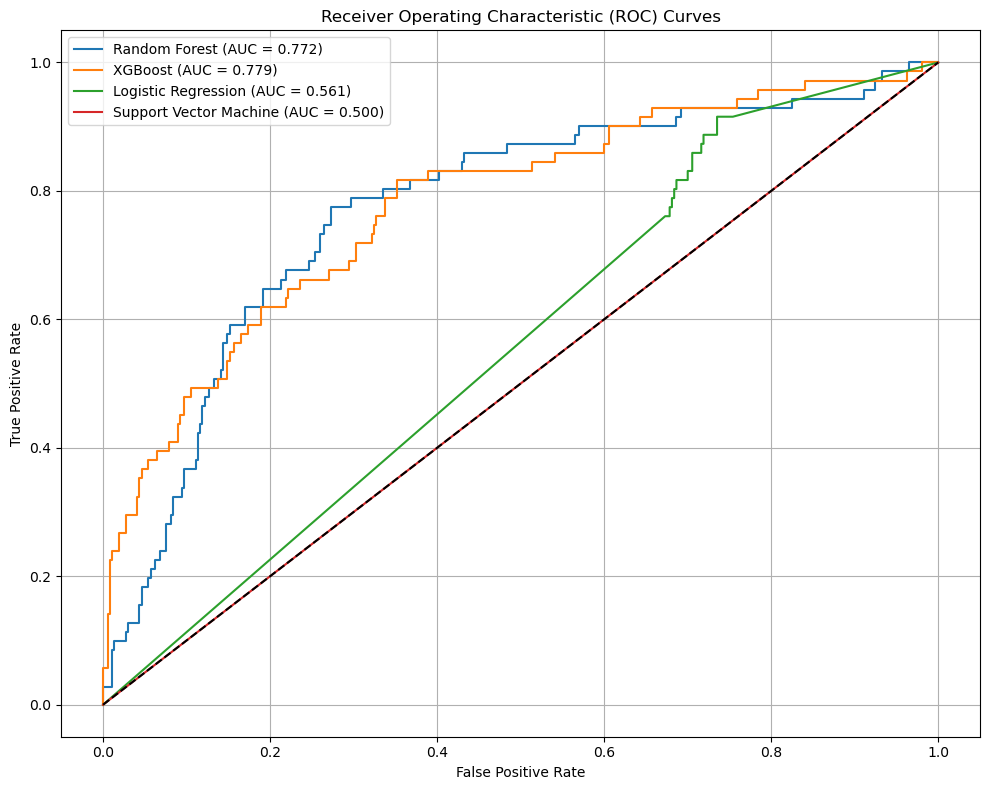

In [112]:
plt.figure(figsize=(10, 8))

# Iterate through each model
for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        # Predict probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()